# Prerequisites

- Python 3.10.4
- RSA dataframe
- fiona, pyproj, shapely, mglearn
- Geopandas


> Warning: Installation from conda envrionment may take few minutes

```cmd
conda create -n geo_env
conda activate geo_env
conda config --env --add channels conda-forge
conda config --env --set channel_priority strict
conda install python=3 geopandas
conda install openpyxl
conda install pandas
conda install mglearn
conda install haversine
conda install seaborn
conda install datascience
conda install -c conda-forge imbalanced-learn
```

Install jupyter notebook on geo_env environment
```cmd
conda install jupyter notebook
python -m ipykernel install --name geo_env
```

Run jupiter 
```cmd
jupyter notebook
```

<img src="rsa/visualization/images/img0_prerequisites_geopanda_install.png" width="800" height="400">



# RSA Maps of Collisions

- Map:            https://public.healthatlasireland.ie/rsa2/index.html
- Report 2016:    https://www.rsa.ie/docs/default-source/about/road-casualties-and-collisions-in-ireland-2016---tables.pdf?Status=Master&sfvrsn=de40c7e9_3


In [1]:
import pandas as pd
import rsa

# Optimizes plots an visualization respect to the current computer and display screen.
%config InLineBackend.figure_format = "retina"


C:\Users\rmsry\anaconda3\envs\geo_env\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


Testing epsg_900913_to_4326....
Testing haversine_distance....
Setting color pallete to tab10...


In [2]:
#load xml data
collisions_df = pd.read_excel("rsa/data/traffic-collisions/all-2005-2016.xlsx")
collisions_df.head(5)

fid               ns2:coordinates  ns3:splimit  ns3:carrf  ns3:carri  \
0  79928  -700194.222332,7047508.51567           50          0          0   
1  79752  -681648.019803,7029210.12112           50          0          0   
2  79873  -713009.321245,7043223.18436           60          0          0   
3  83409  -699415.157545,7046761.70739           50          0          0   
4  80979  -684439.731383,7032575.81342           50          0          0   

  ns3:sex  ns3:county  ns3:pcycrf  ns3:goodsri  ns3:year  ...  ns3:unknri  \
0       M           6           0            0        16  ...           0   
1       F           6           0            0        16  ...           0   
2       F           6           0            0        16  ...           0   
3       M           6           0            0        16  ...           0   
4       M           6           0            0        16  ...           0   

   ns3:mcycrf ns3:mcycri  ns3:no_minor  ns3:no_fatal  ns3:hour  ns3:otherrf  \
0           0          0             1             0         4            0   
1           0          0             2             0         3            0   
2           0          0             2             0         1            0   
3           0          0             1             0         3            0   
4           0          0             1             0         3            0   

   ns3:type  ns3:age  ns3:weekday  
0         3        6            7  
1         3        6            3  
2         3        6            6  
3         3        8            3  
4         3        6            2  

[5 rows x 35 columns]

In [3]:
# columns names
new_names =  {  'fid':                  rsa.enums.feature_names.ID,           # id
                'ns2:coordinates':      rsa.enums.feature_names.GPS,          # gps coordinates lat,long
                'ns3:splimit':          rsa.enums.feature_names.SPLIMIT,      # Speed limit
                'ns3:type':             rsa.enums.feature_names.OUTCOME,      # 1 Fatal, 2 Serious, 3 Minor
                'ns3:sex':              rsa.enums.feature_names.GENDER,       # gender
                'ns3:age':              rsa.enums.feature_names.AGE,          # age
                'ns3:county':           rsa.enums.feature_names.COUNTY,       # county
                'ns3:year':             rsa.enums.feature_names.YEAR,         # Year
                'ns3:weekday' :         rsa.enums.feature_names.WEEKDAY,      # Week day
                'ns3:hour':             rsa.enums.feature_names.HOUR,         # Hour period
                'ns3:prcoltyp':         rsa.enums.feature_names.CIRCUMSTANCES,# Circumstances
                'ns3:vehicle':          rsa.enums.feature_names.VEHICLE,      # Vehicle
                'ns3:class1':           rsa.enums.feature_names.VEHICLE_TYPE,  # Vehicle Type
                'ns3:class2':           rsa.enums.feature_names.VEHICLE_TYPE2, # Vehicle Type 2
                
                # No. casualties - total = no_fatal + no_serious + no_minor
                'ns3:no_serious':       rsa.enums.feature_names.NO_SERIOUS,   # No serious casualties
                'ns3:no_minor':         rsa.enums.feature_names.NO_MINOR,     # No minor casualties
                'ns3:no_fatal':         rsa.enums.feature_names.NO_FATAL,     # No fatal casualties
                'ns3:no_notinjured':    rsa.enums.feature_names.NO_NOTINJURED,# No not injured casualties
                'ns3:no_unknown':       rsa.enums.feature_names.NO_UNKONWN,   # No Unkonwn casualties
                
                # TBC
                'ns3:carrf':            rsa.enums.feature_names.CAR_RF,    # car rf 
                'ns3:carri':            rsa.enums.feature_names.CAR_RI,    # car ri

                'ns3:pcycrf':           rsa.enums.feature_names.PCYC_RF,   # pcy rf 
                'ns3:pcycri':           rsa.enums.feature_names.PCYC_RI,   # pcy ri

                'ns3:goodsrf':          rsa.enums.feature_names.GOODS_RF,  # Goods vehicle rf
                'ns3:goodsri':          rsa.enums.feature_names.GOODS_RI,  # Goods vehicle ri

                'ns3:pedrf':            rsa.enums.feature_names.PED_RF,    # Pedestrian rf
                'ns3:pedri':            rsa.enums.feature_names.PED_RI,    # Pedestrian ri
                
                'ns3:psvrf':            rsa.enums.feature_names.PSV_RF,    # psv rf
                'ns3:psvri':            rsa.enums.feature_names.PSV_RI,    # psv ri

                'ns3:mcycrf':           rsa.enums.feature_names.MCYC_RF,   # Motorcycle rf
                'ns3:mcycri':           rsa.enums.feature_names.MCYC_RI,   # Motorcycle ri

                'ns3:unknrf':           rsa.enums.feature_names.UNKNOWN_RF,   # Unkonwn rf
                'ns3:unknri':           rsa.enums.feature_names.UNKONWN_RI,   # Unkonwn ri

                'ns3:otherrf':          rsa.enums.feature_names.OTHER_RF,
                'ns3:otherri':          rsa.enums.feature_names.OTHER_RI,                
              }
              
collisions_df.rename(columns=new_names, inplace=True)

In [4]:
collisions_df.columns

Index(['id', 'gps', 'splimit', 'carrf', 'carri', 'gender', 'county', 'pcycrf',
       'goodsri', 'year', 'pcycri', 'goodsrf', 'circumstances', 'pedri',
       'pedrf', 'psvrf', 'no_unknown', 'otherri', 'vehicle', 'vehicle_type2',
       'vehicle_type', 'unknrf', 'psvri', 'no_serious', 'no_notinjured',
       'unknri', 'mcycrf', 'mcycri', 'no_minor', 'no_fatal', 'hour', 'otherrf',
       'outcome', 'age', 'weekday'],
      dtype='object')

# EDA

In [5]:
collisions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             15000 non-null  int64 
 1   gps            15000 non-null  object
 2   splimit        15000 non-null  int64 
 3   carrf          15000 non-null  int64 
 4   carri          15000 non-null  int64 
 5   gender         14203 non-null  object
 6   county         15000 non-null  int64 
 7   pcycrf         15000 non-null  int64 
 8   goodsri        15000 non-null  int64 
 9   year           15000 non-null  int64 
 10  pcycri         15000 non-null  int64 
 11  goodsrf        15000 non-null  int64 
 12  circumstances  15000 non-null  object
 13  pedri          15000 non-null  int64 
 14  pedrf          15000 non-null  int64 
 15  psvrf          15000 non-null  int64 
 16  no_unknown     15000 non-null  int64 
 17  otherri        15000 non-null  int64 
 18  vehicle        15000 non-n

In [6]:
collisions_df.describe()

id       splimit    carrf         carri        county  \
count  15000.000000  15000.000000  15000.0  15000.000000  15000.000000   
mean   42201.526867     54.243333      0.0      0.022733      6.785067   
std    26987.727524     15.403028      0.0      0.281819      3.669264   
min        2.000000     10.000000      0.0      0.000000      6.000000   
25%    18873.750000     50.000000      0.0      0.000000      6.000000   
50%    37910.500000     50.000000      0.0      0.000000      6.000000   
75%    70657.750000     50.000000      0.0      0.000000      6.000000   
max    83499.000000    120.000000      0.0     17.000000     26.000000   

        pcycrf       goodsri          year        pcycri  goodsrf  ...  \
count  15000.0  15000.000000  15000.000000  15000.000000  15000.0  ...   
mean       0.0      0.000400     11.054133      0.000733      0.0  ...   
std        0.0      0.019997      3.646984      0.027071      0.0  ...   
min        0.0      0.000000      5.000000      0.000000      0.0  ...   
25%        0.0      0.000000      8.000000      0.000000      0.0  ...   
50%        0.0      0.000000     11.000000      0.000000      0.0  ...   
75%        0.0      0.000000     14.000000      0.000000      0.0  ...   
max        0.0      1.000000     16.000000      1.000000      0.0  ...   

       no_notinjured       unknri   mcycrf        mcycri      no_minor  \
count   15000.000000  15000.00000  15000.0  15000.000000  15000.000000   
mean        1.049667      0.00080      0.0      0.000600      1.152600   
std         0.883054      0.06928      0.0      0.024488      0.717134   
min         0.000000      0.00000      0.0      0.000000      0.000000   
25%         1.000000      0.00000      0.0      0.000000      1.000000   
50%         1.000000      0.00000      0.0      0.000000      1.000000   
75%         1.000000      0.00000      0.0      0.000000      1.000000   
max         8.000000      6.00000      0.0      1.000000     10.000000   

           no_fatal          hour  otherrf       outcome       weekday  
count  15000.000000  15000.000000  15000.0  15000.000000  15000.000000  
mean       0.014067      2.709200      0.0      2.901600      4.110067  
std        0.123301      1.324671      0.0      0.340086      1.873371  
min        0.000000      1.000000      0.0      1.000000      1.000000  
25%        0.000000      2.000000      0.0      3.000000      3.000000  
50%        0.000000      2.000000      0.0      3.000000      4.000000  
75%        0.000000      4.000000      0.0      3.000000      6.000000  
max        3.000000      6.000000      0.0      3.000000      7.000000  

[8 rows x 31 columns]

## Undocumented dataset features RF - RI columns.

> There is undocumented features on the dataset, although details can be inferred from the column name and values. We will have a keep look on how relevant is the information on them before decide removing them from the annalisys. A wrong assumption on the significant of these undocumented columns could also deal to wrong predictions / interpretations. So we will take caution, before making any decision on them, lets take a closer look on them as we can still find relationships on them.


> "carrf", "carri", "pcycrf","pcycri","goodsrf","goodsri","pedrf","pedri","psvrf","psvri","mcycrf","mcycri","unknrf","unknri","otherrf","otherri"

> Features names suggest are regarding Car, Pedal Cycle Users, Goods Vehicle User, Pedestrians, PSV Users (Public Service Vehicles), Motor Cycle Users, Unknown, other however suffix which seems to indicate indicates injured or fatal outcome, may needs to be confirmed.

In [7]:
ri_columns = ["carri","pcycri","goodsri","pedri","psvri","mcycri","unknri","otherri"]
rf_columns = ["carrf","pcycrf","goodsrf","pedrf","psvrf","mcycrf","unknrf","otherrf"]

collisions_df[ri_columns].sum()

carri      341
pcycri      11
goodsri      6
pedri       14
psvri       67
mcycri       9
unknri      12
otherri     11
dtype: int64

In [8]:
collisions_df[rf_columns].sum()

carrf      0
pcycrf     0
goodsrf    0
pedrf      0
psvrf      0
mcycrf     0
unknrf     0
otherrf    0
dtype: int64

> rf columns can be deleted as there is no data values and lack of documentation

In [9]:
# drop rf columns
if "carrf" in collisions_df.columns:
    collisions_df.drop(columns=rf_columns, inplace=True)

### RI Columns - plots
For the outsanding of RI columns it will evaluted to see any pattern or relationships that may appear from their given names and the actual vehicle types.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot using seaborn library
sns.set(style='whitegrid', context='notebook')

# Consider the following columns from the entire dataset
ri_columns2 = ["outcome","vehicle_type"]
ri_columns2.extend(ri_columns)
ri_columns2_df = rsa.convert_df_labels(collisions_df[ri_columns2])


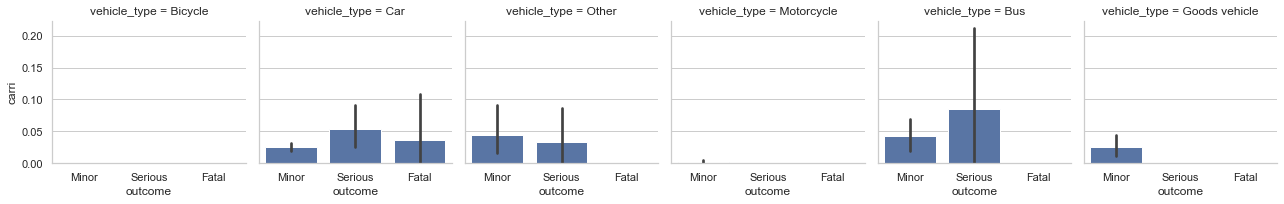

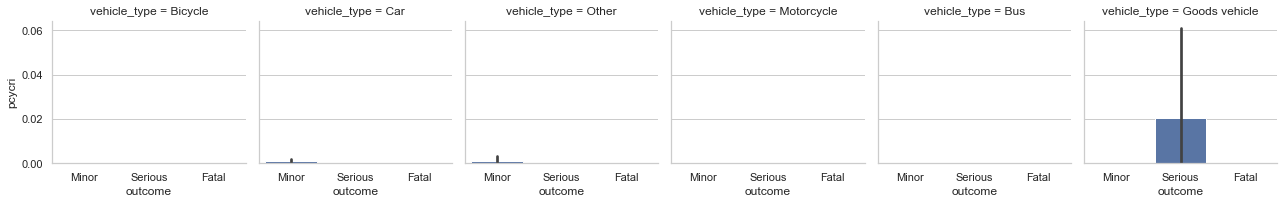

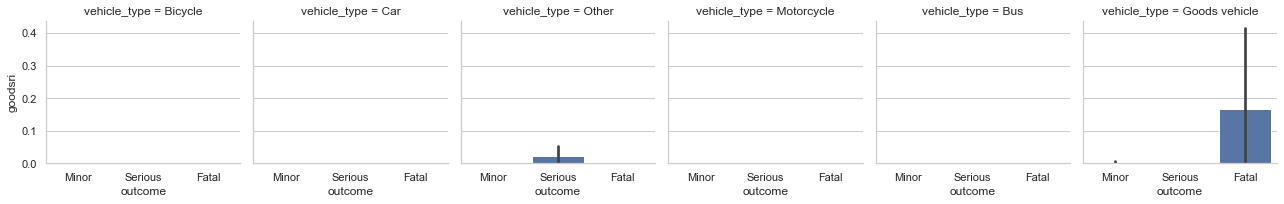

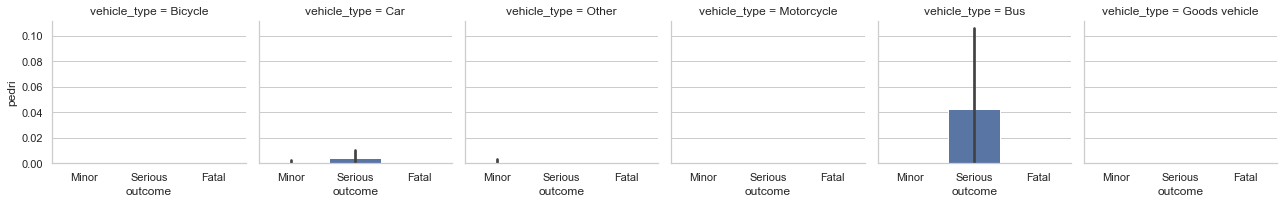

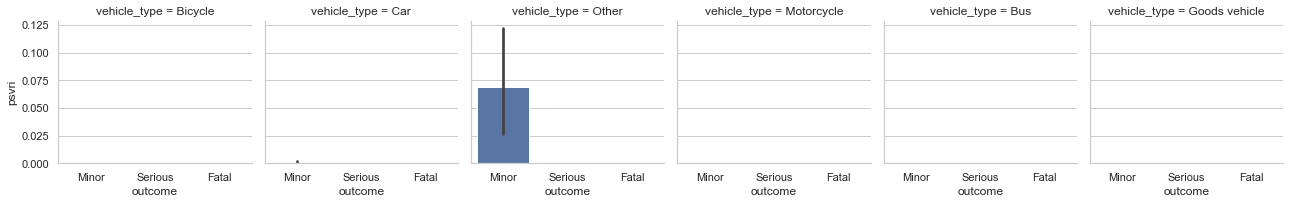

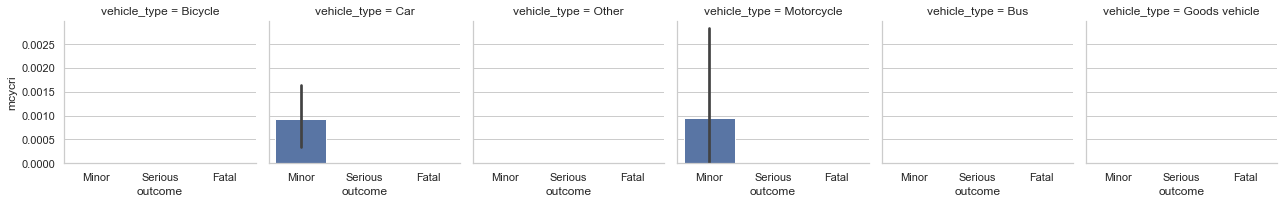

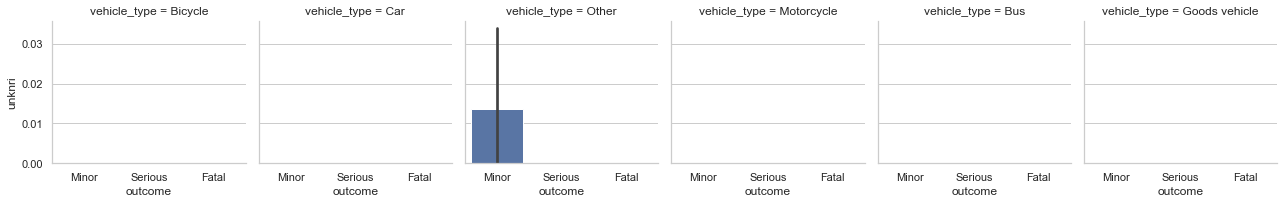

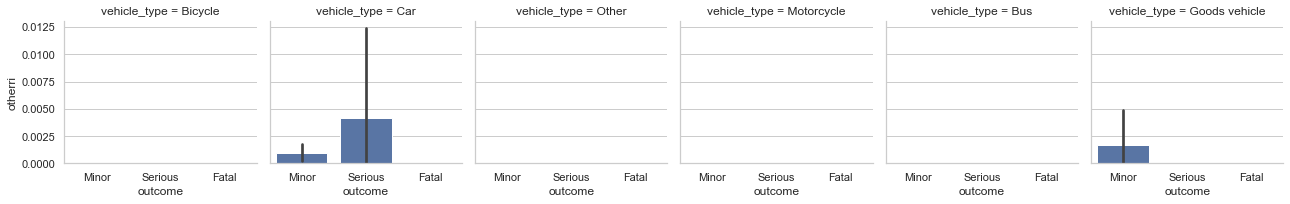

In [11]:
for c in ri_columns2_df:
    if c != "vehicle_type" and c != "outcome":
        g = sns.FacetGrid(ri_columns2_df, col="vehicle_type");
        g.map(sns.barplot, "outcome", c, order=["Minor", "Serious", "Fatal"]);
        if c == 'carri':
            plt.savefig("rsa/visualization/images/img9_carri_column.png")

> *Most of the columns shows correlation with vehicle type in 1 or 2 characteristics, with the exception of "carri" that it's related with 4 types Car, Other, Bus and Goods services. It will be drop for now from the analisys as variable name doesn't relate with vehicle type*

In [12]:
# drop rf columns
if "carri" in collisions_df.columns:
    collisions_df.drop(columns=ri_columns, inplace=True)

## Order columns

In [13]:
# Rearrange columns order
rearrange_columns = ["id","gps","year","weekday","hour","splimit","gender","age","county","vehicle","vehicle_type","vehicle_type2","circumstances","no_unknown","no_notinjured","no_minor","no_serious","no_fatal","outcome"]
collisions_df = collisions_df[rearrange_columns]
collisions_df.head(5)

id                           gps  year  weekday  hour  splimit gender  \
0  79928  -700194.222332,7047508.51567    16        7     4       50      M   
1  79752  -681648.019803,7029210.12112    16        3     3       50      F   
2  79873  -713009.321245,7043223.18436    16        6     1       60      F   
3  83409  -699415.157545,7046761.70739    16        3     3       50      M   
4  80979  -684439.731383,7032575.81342    16        2     3       50      M   

  age  county  vehicle  vehicle_type  vehicle_type2 circumstances  no_unknown  \
0   6       6        2             1              3            10           0   
1   6       6        4             3              3             7           0   
2   6       6        4             3              3             7           0   
3   8       6        1             8             88             1           0   
4   6       6        4             3              3             7           0   

   no_notinjured  no_minor  no_serious  no_fatal  outcome  
0              1         1           0         0        3  
1              3         2           0         0        3  
2              1         2           0         0        3  
3              1         1           0         0        3  
4              4         1           0         0        3

## Duplicates detection

Datasets come in groups of xml data of 1000 records, each group correspond to the map navigation at layer 10 of them where the zoom was sufficient to return the info from the GIS server. At this level of zoom it was necesary to navigate from the map covering the whole area of the Dublin City, producing 15 datasets of 1000 records each. As the navigation has overlaps to cover all the space, it is expected it will be duplicated recorsd on them.

In [14]:
# Number of duplicated records by id
duplicated_records_by_id = collisions_df.id.duplicated(keep='first')
print("number of duplicate rows: ", collisions_df[duplicated_records_by_id].shape)

# Number of duplicated records in Data Frame (as cross validation)
duplicate_rows_df = collisions_df[collisions_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (4391, 19)
number of duplicate rows:  (4391, 19)


In [15]:
collisions_df = collisions_df.drop_duplicates()
print(collisions_df.shape)

(10609, 19)


## Null values

In [16]:
collisions_df.isnull().sum()

id                 0
gps                0
year               0
weekday            0
hour               0
splimit            0
gender           578
age                0
county             0
vehicle            0
vehicle_type       0
vehicle_type2      0
circumstances      0
no_unknown         0
no_notinjured      0
no_minor           0
no_serious         0
no_fatal           0
outcome            0
dtype: int64

## Gender column - Null Values

In [17]:
def map_gender(x):
    if x == 'M':
        return 1
    elif x == 'F':
        return 2
    else:
        return 0
# Update null with unkonwn category value
collisions_df.gender.fillna(0, inplace=True)
collisions_df.groupby('gender')['id'].nunique()
collisions_df['gender'] = collisions_df.gender.apply(map_gender)
collisions_df.groupby('gender')['id'].nunique()

gender
0     578
F    3189
M    6842
Name: id, dtype: int64

gender
0     578
1    6842
2    3189
Name: id, dtype: int64

## Year column

It was noted in the RSA map that speed limit for records before 2005 where recorded as Milles Per Hours instead of Kilomters per hours. Let's investigate range values on the year column so see if further conversion is required on speed limit

```javascript

    if(i == "year") {
        var iYear = parseInt(feature.attributes[i], 10) + 2000;
        year = "<tr><td>" + colsToName[i] + "</td><td> " + iYear + "</td></tr>";
        if(year < 5) {
            splim += " MPH";
        } else {
            splim += " KPH";
        }
        splim += "</td></tr>";
    }

```

In [18]:
sorted(collisions_df.year.unique())

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [19]:
# Format year to yyyy
collisions_df.year = collisions_df.year.apply(lambda x:  x + 2000 if x < 2000 else x );

> *No records found before 2005*

## Weekday column

In [20]:
# Confirm all values are in range of valid for analisys.
weekdays_lst = sorted(collisions_df.weekday.unique())
for d in weekdays_lst:
    print(rsa.dictionaries.DAY_OF_WEEK.get(d))

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday


## Hour column

In [21]:
# Confirm all values are in range of valid for analisys.

hour_lst = sorted(collisions_df.hour.unique())
for h in hour_lst:
    print(rsa.dictionaries.HOURS_LONG.get(h))


7am to 10am
10am to 4pm
4pm to 7pm
7pm to 11pm
11pm to 3am
3am to 7am


## Age Groups column

In [22]:
collisions_df.age.unique()

array(['6', '8', '5', '7', '9', '2', '3', '1', '4', '65', 'None'],
      dtype=object)

In [23]:
collisions_df.groupby('age')['id'].nunique()

age
1         88
2        115
3        495
4        993
5       2820
6       2423
65        16
7       1554
8        873
9        590
None     642
Name: id, dtype: int64

In [24]:
# Replace None with 99 Unknown group and convert to integer value
collisions_df.age = collisions_df.age.apply(lambda x : rsa.enums.age_groups._0_9 if x == 'None' else int(x) );

## Circumstances column

In [25]:
collisions_df.circumstances.describe()

count     10609
unique       11
top          10
freq       3796
Name: circumstances, dtype: object

In [26]:
collisions_df.circumstances.astype("category").value_counts()

10      3796
7       2094
1       1276
2       1138
6        739
3        529
5        440
4        293
None     118
8         95
9         91
Name: circumstances, dtype: int64

In [27]:
collisions_df.circumstances = collisions_df.circumstances.apply(lambda x: rsa.enums.circumstance.OTHER if x == 'None' else int(x))

## Convert gps column

Standarise RSA map gps location use EPSG:900913 (OR EPSG:3857) grid, however it's commonly used in other datasets GPS location in format EPSG:4326 (WGS 84 latitud longitude)

- https://epsg.org/home.html
- https://epsg.org/crs_4326/WGS-84.html
- https://epsg.org/crs_3857/WGS-84-Pseudo-Mercator.html?sessionkey=msgy6wxv94
- https://www.iogp.org/wp-content/uploads/2019/09/373-07-02.pdf

In EPSG the world is between 85.06°S and 85.06°N. and -180° left to 180° right
NAME:	World - 85°S to 85°N
CODE:	3544
DESCRIPTION:	
World between 85.06°S and 85.06°N. (Map tile service latitude limit is +/- 85.05112878°.)



In [28]:
# Add latitude / logitude as columns.
if 'latitude' not in collisions_df.columns:
    print("convert Easting / Northing to Latitude /  Longitude columns")
    gps_data = pd.DataFrame.from_records(data = collisions_df.apply(rsa.geo_convert_gps,axis=1), columns=['id','latitude','longitude'])
    collisions_df = collisions_df.merge(gps_data,how="left", on=["id"])

convert Easting / Northing to Latitude /  Longitude columns


In [29]:
if 'gps' in collisions_df.columns:
    collisions_df.drop(['gps'], inplace=True, axis=1)

collisions_df.head(5)

id  year  weekday  hour  splimit  gender  age  county  vehicle  \
0  79928  2016        7     4       50       1    6       6        2   
1  79752  2016        3     3       50       2    6       6        4   
2  79873  2016        6     1       60       2    6       6        4   
3  83409  2016        3     3       50       1    8       6        1   
4  80979  2016        2     3       50       1    6       6        4   

   vehicle_type  vehicle_type2  circumstances  no_unknown  no_notinjured  \
0             1              3             10           0              1   
1             3              3              7           0              3   
2             3              3              7           0              1   
3             8             88              1           0              1   
4             3              3              7           0              4   

   no_minor  no_serious  no_fatal  outcome   latitude  longitude  
0         1           0         0        3  53.347350  -6.289952  
1         2           0         0        3  53.249110  -6.123348  
2         2           0         0        3  53.324363  -6.405072  
3         1           0         0        3  53.343345  -6.282953  
4         1           0         0        3  53.267197  -6.148427

## Vehicle columns
Dataset include 3 columns however only class1 or vehicle_type are relevant for cars. The rest of the values are not defined. In this case a new category column will be create to replace this 3, mapping any unkown value to "Other"

vehicleTypes = {
    1: "Bicycle", 
    2: "Motorcycle", 
    3: "Car", 
    4: "Goods vehicle", 
    5: "Bus",
    6: "Other"};

In [30]:
sorted(collisions_df.vehicle.unique()), sorted(collisions_df.vehicle_type.unique()), sorted(collisions_df.vehicle_type2.unique())

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 89],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 88],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 88])

In [31]:
collisions_df.vehicle_type.unique()
collisions_df['vehicle_type'].astype('category').value_counts()

array([ 1,  3,  8,  2,  5, 12, 14, 88,  4, 10,  9,  7, 11, 13,  6],
      dtype=int64)

3     6543
1     1418
2      867
5      590
4      488
8      193
14     173
88     102
10      87
12      45
7       30
9       29
13      27
11       9
6        8
Name: vehicle_type, dtype: int64

> Map unknown vehicle types to other

In [32]:
collisions_df.vehicle_type = collisions_df.vehicle_type.apply(rsa.map_unknown_vehicle_type)

Mapping of unknown vehicle types to other category collisions_df.vehicle_type = collisions_df.vehicle_type.apply(rsa.map_unknown_vehicle_type)
Percentages of accidents by vehicle type

In [33]:

rsa.convert_df_labels(collisions_df)["vehicle_type"].astype('category').value_counts()/collisions_df["vehicle_type"].shape[0]*100

Car              61.674050
Bicycle          13.366010
Motorcycle        8.172307
Other             6.626449
Bus               5.561316
Goods vehicle     4.599868
Name: vehicle_type, dtype: float64

> *A total 695 records has been reclasified to "Other" type*
> There is also umbalance on the data as number o cars and bycicle takes almost 75% of the dataset

#### Drop undocumented vehicle columns

In [34]:
# drop other vehicle categories
collisions_df.drop(['vehicle','vehicle_type2'], inplace=True, axis=1)

## Outcome column

At a first glance reviewing Outcome column provided in the original dataset some result didn't look correct regarding the total count of casualties columns. let's have a closer to look into it calculating outcome based on the sub total columns. and identify 


In [35]:
# Calculate total number of casualties
collisions_df['total_casualties'] = collisions_df.apply(rsa.set_total_casualties, axis=1)    

# Calculate outcome from existing number of casualties
collisions_df['outcome_calculated'] = collisions_df.apply(rsa.set_calculated_outcome, axis=1)

# Compare original outcome column with calculated one
collisions_labels_df = rsa.convert_df_labels(collisions_df)
collisions_labels_df.loc[ collisions_labels_df.outcome != collisions_labels_df.outcome_calculated ]

id  year        weekday       hour  splimit   gender        age  \
222    80378  2016     6 - Friday  1900-2300       60     Male  G6: 25-34   
465    77956  2016     6 - Friday  1900-2300       50     Male    G1: 0-9   
1708   27063  2006    3 - Tuesday  0700-1000       60     Male  G4: 18-20   
1739   33365  2009     2 - Monday  0700-1000       60   Female  G6: 25-34   
1774   48332  2005    3 - Tuesday  1000-1600      120  Unknown    G1: 0-9   
...      ...   ...            ...        ...      ...      ...        ...   
10277  50178  2005    3 - Tuesday  2300-0300       30   Female  G5: 21-24   
10399  47744  2005    3 - Tuesday  1000-1600       30  Unknown  G5: 21-24   
10452  28034  2006     2 - Monday  0700-1000       50     Male  G5: 21-24   
10558  28977  2006   7 - Saturday  1000-1600       50  Unknown  G6: 25-34   
10608  11335  2008  4 - Wednesday  1600-1900       60   Female  G3: 15-17   

       county vehicle_type         circumstances  no_unknown  no_notinjured  \
222    Dublin          Car    Rear end, straight           0              4   
465    Dublin      Bicycle                 Other           0              1   
1708   Dublin          Car     Angle, right turn          11              2   
1739   Dublin          Car    Rear end, straight          11              2   
1774   Dublin          Car    Rear end, straight          11              1   
...       ...          ...                   ...         ...            ...   
10277  Dublin          Car    Rear end, straight          14              4   
10399  Dublin          Car                 Other          10              2   
10452  Dublin          Car    Rear end, straight          12              1   
10558  Dublin          Car    Rear end, straight           3              2   
10608  Dublin          Car  Rear end, right turn          11              2   

       no_minor  no_serious  no_fatal  outcome   latitude  longitude  \
222           0           0         0    Minor  53.287913  -6.342120   
465           1           0         0  Serious  53.343173  -6.401065   
1708          0           0         0    Minor  53.296122  -6.309468   
1739          0           0         0    Minor  53.314213  -6.223742   
1774          0           0         0    Minor  53.317583  -6.368419   
...         ...         ...       ...      ...        ...        ...   
10277         0           0         0    Minor  53.434341  -6.230779   
10399         0           0         0    Minor  53.458567  -6.267602   
10452         0           0         0    Minor  53.319290  -6.213451   
10558         0           0         0    Minor  53.447581  -6.177423   
10608         0           0         0    Minor  53.279073  -6.132762   

       total_casualties outcome_calculated  
222                 0.0        Not Injured  
465                 1.0              Minor  
1708                0.0        Not Injured  
1739                0.0        Not Injured  
1774                0.0        Not Injured  
...                 ...                ...  
10277               0.0        Not Injured  
10399               0.0        Not Injured  
10452               0.0        Not Injured  
10558               0.0        Not Injured  
10608               0.0        Not Injured  

[105 rows x 20 columns]

> *A total of 6 records are different compared with original outcome feature. This could be a correction in the data after cross comparison with hospitals results. For the scope of this analisys predicting an outcome based on total count of casualties "**outcome_calculted**" will be use, as it keeps consitency of the data provided.*

In [36]:
# Drop outcome
if rsa.enums.feature_names.OUTCOME in collisions_df.columns:
    collisions_df.drop(['outcome'], inplace=True, axis=1)

In [37]:
collisions_labels_df.outcome_calculated.value_counts()

Minor          9582
Serious         771
Fatal           154
Not Injured      87
Name: outcome_calculated, dtype: int64

### Drop Not injured

In [38]:
collisions_df = collisions_df[collisions_df[rsa.enums.feature_names.OUTCOME_CALCULATED] != rsa.enums.outcome.NOT_INJURED ]

### Is Fatal Accident

In [39]:
# Is Fatal accident
collisions_df[rsa.enums.feature_names.IS_FATAL] = collisions_df['outcome_calculated'] == rsa.enums.outcome.FATAL;

## New computed Severity column
### Classifying between the major crash injuries and minor crash severity condition
The injury severity levels are divided into two broad categories—low severity (including minor and medically treated injuries) and high severity (including hospitalised and fatal injuries). The four different severity levels are associated with data imbalance since there are few data records for fatal and minor injury.

The imbalance in the datasets may result in the deteriorated performance of the classification models having an imbalanced confusion matrix and thus a higher gap between sensitivity and specificity. Therefore, to tackle the data imbalance issue in injury severity levels, these were converted to a binary class—low severity (positive class) and high severity (negative class).

In [40]:

collisions_df['severity'] = collisions_df.apply(rsa.set_severity, axis=1)

# remove null severity records
collisions_df = collisions_df[~collisions_df.severity.isnull()]


## Sub totals columns (drop)

In [41]:
sub_total_columns = [
    rsa.enums.feature_names.NO_UNKONWN,
    rsa.enums.feature_names.NO_SERIOUS, 
    rsa.enums.feature_names.NO_NOTINJURED, 
    rsa.enums.feature_names.NO_MINOR, 
    rsa.enums.feature_names.NO_FATAL]
collisions_df.drop(sub_total_columns, inplace=True, axis=1)

# Geo analisys DCC

Data provided includes details of the greater dublin area. For the scope of this study we are interested on the dublin city council details, a series of geographical calculations and cluster visualization are required to get a better understanding of the dataset.



In [42]:
# generate geo dataframe
import warnings
warnings.filterwarnings('ignore')

import geopandas as gp
import pandas as pd
from shapely.geometry import Point

geo_df = gp.GeoDataFrame(collisions_df, 
                          crs={'init': 'epsg:4326'}, 
                          geometry=[Point(xy) for xy in zip(collisions_df.longitude, collisions_df.latitude)]);

# load dublin city council polygons
dublin_shape_file = "rsa/data/shapefiles/DCC_5CommitteeAreas_2019_2157_.shp"
dublin_gdf = gp.read_file(dublin_shape_file);

Using geo shape of Dublin City Council administrative areas available in the url below we can plot and present the map of casualties.
https://data.gov.ie/dataset/administrative-areas-dcc/resource/646f5862-b330-413e-9fe3-dc89afe1045e


In [43]:
geo_df.shape

(10507, 17)

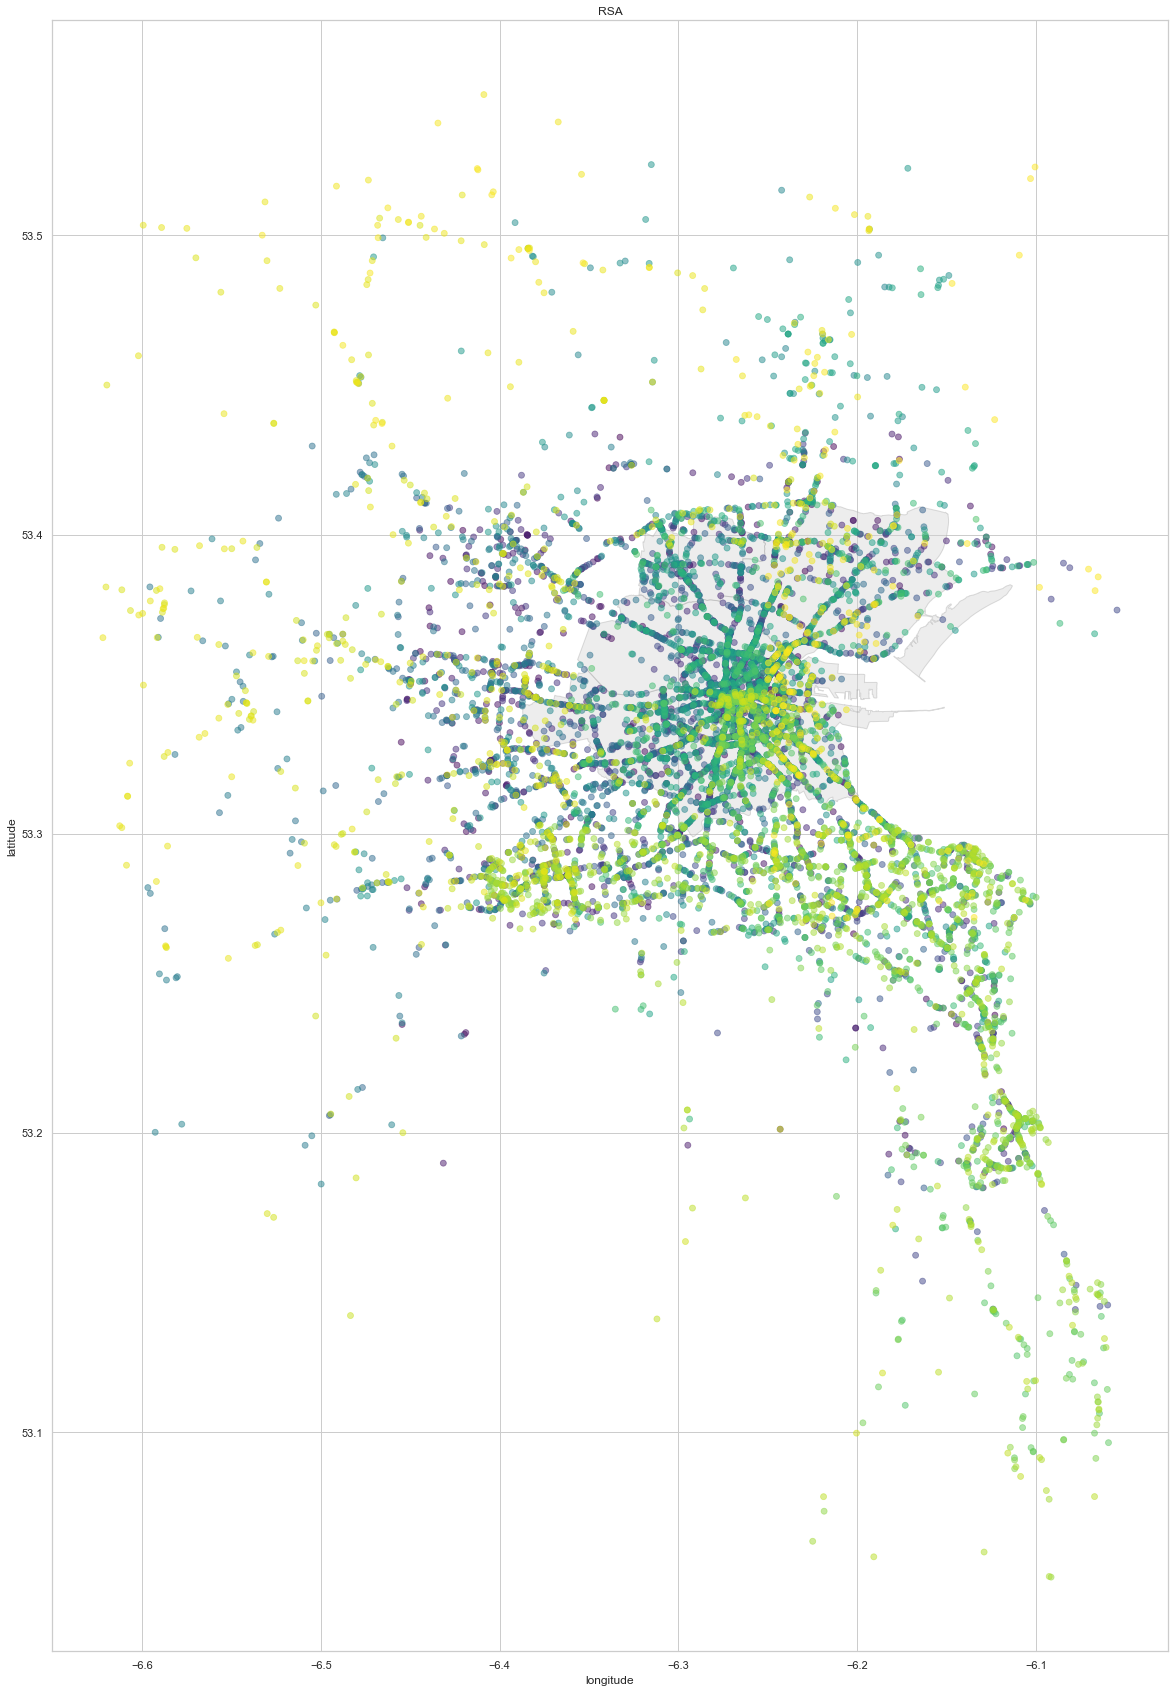

In [44]:
rsa.plot_on_dublin_map(geo_df, dublin_gdf)

As detalied below greater dublin area is included in original dataset. Let's intersect the point that belongs to DCC

In [45]:
dublin_gdf.head(6)

Name                                           geometry
0     NORTH WEST  POLYGON Z ((-6.30628 53.40145 0.00000, -6.3058...
1  NORTH CENTRAL  POLYGON Z ((-6.14532 53.38582 0.00000, -6.1453...
2     SOUTH EAST  POLYGON Z ((-6.27841 53.32989 0.00000, -6.2782...
3  SOUTH CENTRAL  POLYGON Z ((-6.27203 53.34466 0.00000, -6.2720...
4        CENTRAL  POLYGON Z ((-6.29182 53.34741 0.00000, -6.2918...

In [46]:
# Calculate which points belong to Dublin City Council
geo_df['is_dcc'] = geo_df.geometry.apply(lambda point: rsa.geo_is_dcc(point, dublin_gdf))

In [47]:
# Filter DCC only
dcc_geo_df = geo_df[(geo_df.is_dcc == True)]

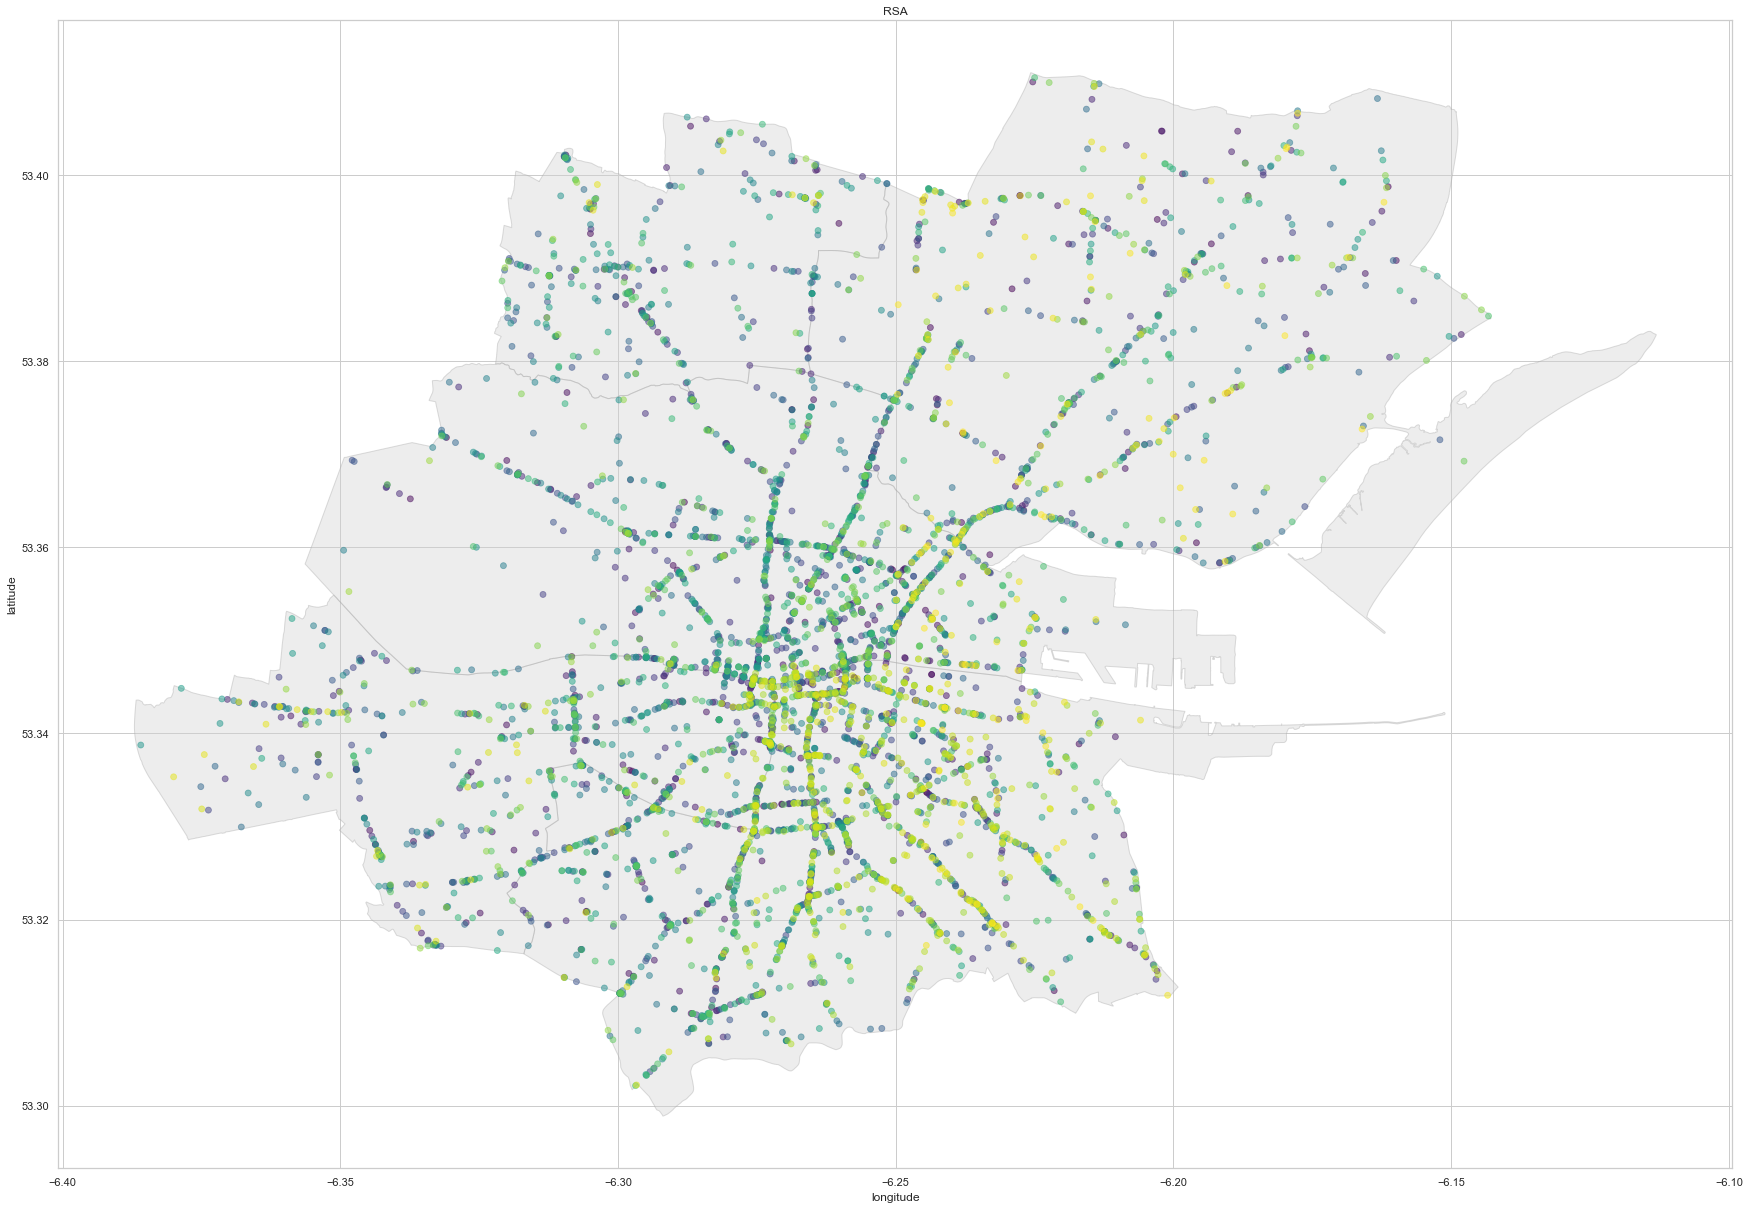

In [48]:
# Plot dcc data.
rsa.plot_on_dublin_map(dcc_geo_df, dublin_gdf, "rsa/visualization/images/img10_dcc_rsa_casualties.png")


In [49]:
# drop is_dcc column
dcc_geo_df = dcc_geo_df.drop(columns=["is_dcc"])

In [50]:
dcc_geo_df.shape

(5328, 17)

### Map: K-means clustering

The K-means algorithm is also referred to as vector quantization. What the algorithm does is finds the cluster (centroid) positions that minimize the distances to all points in the cluster. This is done iteratively; the problem with the algorithm is that it can be a bit greedy, meaning that it will find the nearest minima quickly. This is generally solved with some kind of basin-hopping approach where the nearest minima found is randomly perturbed and the algorithm restarted. Due to this fact, the algorithm is dependent on good initial guesses as input.

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans

# generate synthetic two-dimensional data
X = dcc_geo_df[["latitude","longitude"]]

> Hopkins Statistics:

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.07, ...,0.99}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.1, ..., 0.33}, it has a high tendency to cluster.

Some usefull links to understand Hopkins Statistics:
- [Article](http://www.sthda.com/english/articles/29-cluster-validation-essentials/95-assessing-clustering-tendency-essentials/)
- [WikiPedia](https://en.wikipedia.org/wiki/Hopkins_statistic)

  

In [52]:
print(f"hopkins: {rsa.hopkins(X,100)}")

hopkins: 0.04093133923735832


> Value have high tendency to cluster

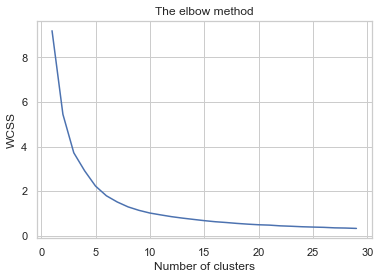

In [53]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0);
    kmeans.fit(X);
    wcss.append(kmeans.inertia_);
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 30), wcss);
plt.title('The elbow method');
plt.xlabel('Number of clusters');
plt.ylabel('WCSS');    # within cluster sum of squares
plt.savefig("rsa/visualization/images/img12_kmeans_elbow.png")
plt.show();


As we can see, at k = 7, the graph begins to flatten significantly, so we will use 7 as the optimal number of clusters.

## Firebrigade and Ambulance stations


Let's plot fit in the map  location of the Fire brigrade and ambulance stations to understand the suitability of each location

Fire station in DCC
- Balbriggan Fire Station
- Dolphin's Barn Fire Station
- Donnybrook Fire Station
- Dublin fire Brigade Headquarters, Tara Street
- Dublin Fire Brigade Stores and Garage
- Dún Laoghaire Fire Station
- Finglas Fire Station
- Kilbarrack Fire Station
- North Strand Fire Station
- Phibsborough Fire Station
- Rathfarnham Fire Station (Sometimes known as Nutgrove Fire Station)
- Skerries Fire Station
- Swords Fire Station

Outside DCC
- Blanchardstown Fire Station
- Tallaght Fire Station

In [54]:
# Commented out stations are not within DCC
fire_ambulance_station = [
    [0,'Tara Street', 53.34729141381545, -6.253533932397394, True],
    [1,'Donnybrook', 53.325529054996395, -6.237788202254831, True],
    [2,'Dolphins Barn', 53.33155452194455, -6.292646645504882, True],
    [3,'Phibsboro', 53.36201334853346, -6.273004610976205, True],    
    [4,'North Strand', 53.36417876122337, -6.239554321978269, True],
    [5,'Finglas', 53.39366980652283, -6.303069026266473, True], 
    [6,'Kilbarrack', 53.39571703731495, -6.168829835478619, True], 
    [7,'Tallaght', 53.310568050713535, -6.382769677448632, False],
    [8,'Rathfarnham', 53.292774362148535, -6.2648760584811525, False],
    [9,'Blanchardstown', 53.393729105105734, -6.3958234091238495, False],
    [10,'Skerries', 53.572296097590765, -6.116713643673273, False],
    [11,'Balbriggan', 53.60586065726681, -6.1867038878524765, False],
    [12,'Dun Laoghaire', 53.28638393264712, -6.152341463759695, False],
    [13,'Swords', 53.477958316978146, -6.220491031137496, False]
]

fire_ambulance_df = pd.DataFrame(fire_ambulance_station, columns=['id', 'name', 'latitude', 'longitude', 'is_dcc'])
fire_station_gpf = gp.GeoDataFrame(fire_ambulance_df, geometry=gp.points_from_xy(fire_ambulance_df.longitude,fire_ambulance_df.latitude))

## Cluster Analysis

In [55]:
# build the clustering model
kmeans = KMeans(n_clusters = 7)
kmeans.fit(X)

dcc_geo_df['knn_cluster'] = kmeans.predict(X)

# Centers
centers_df = gp.GeoDataFrame(kmeans.cluster_centers_,
                              geometry=gp.points_from_xy(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0]))


KMeans(n_clusters=7)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


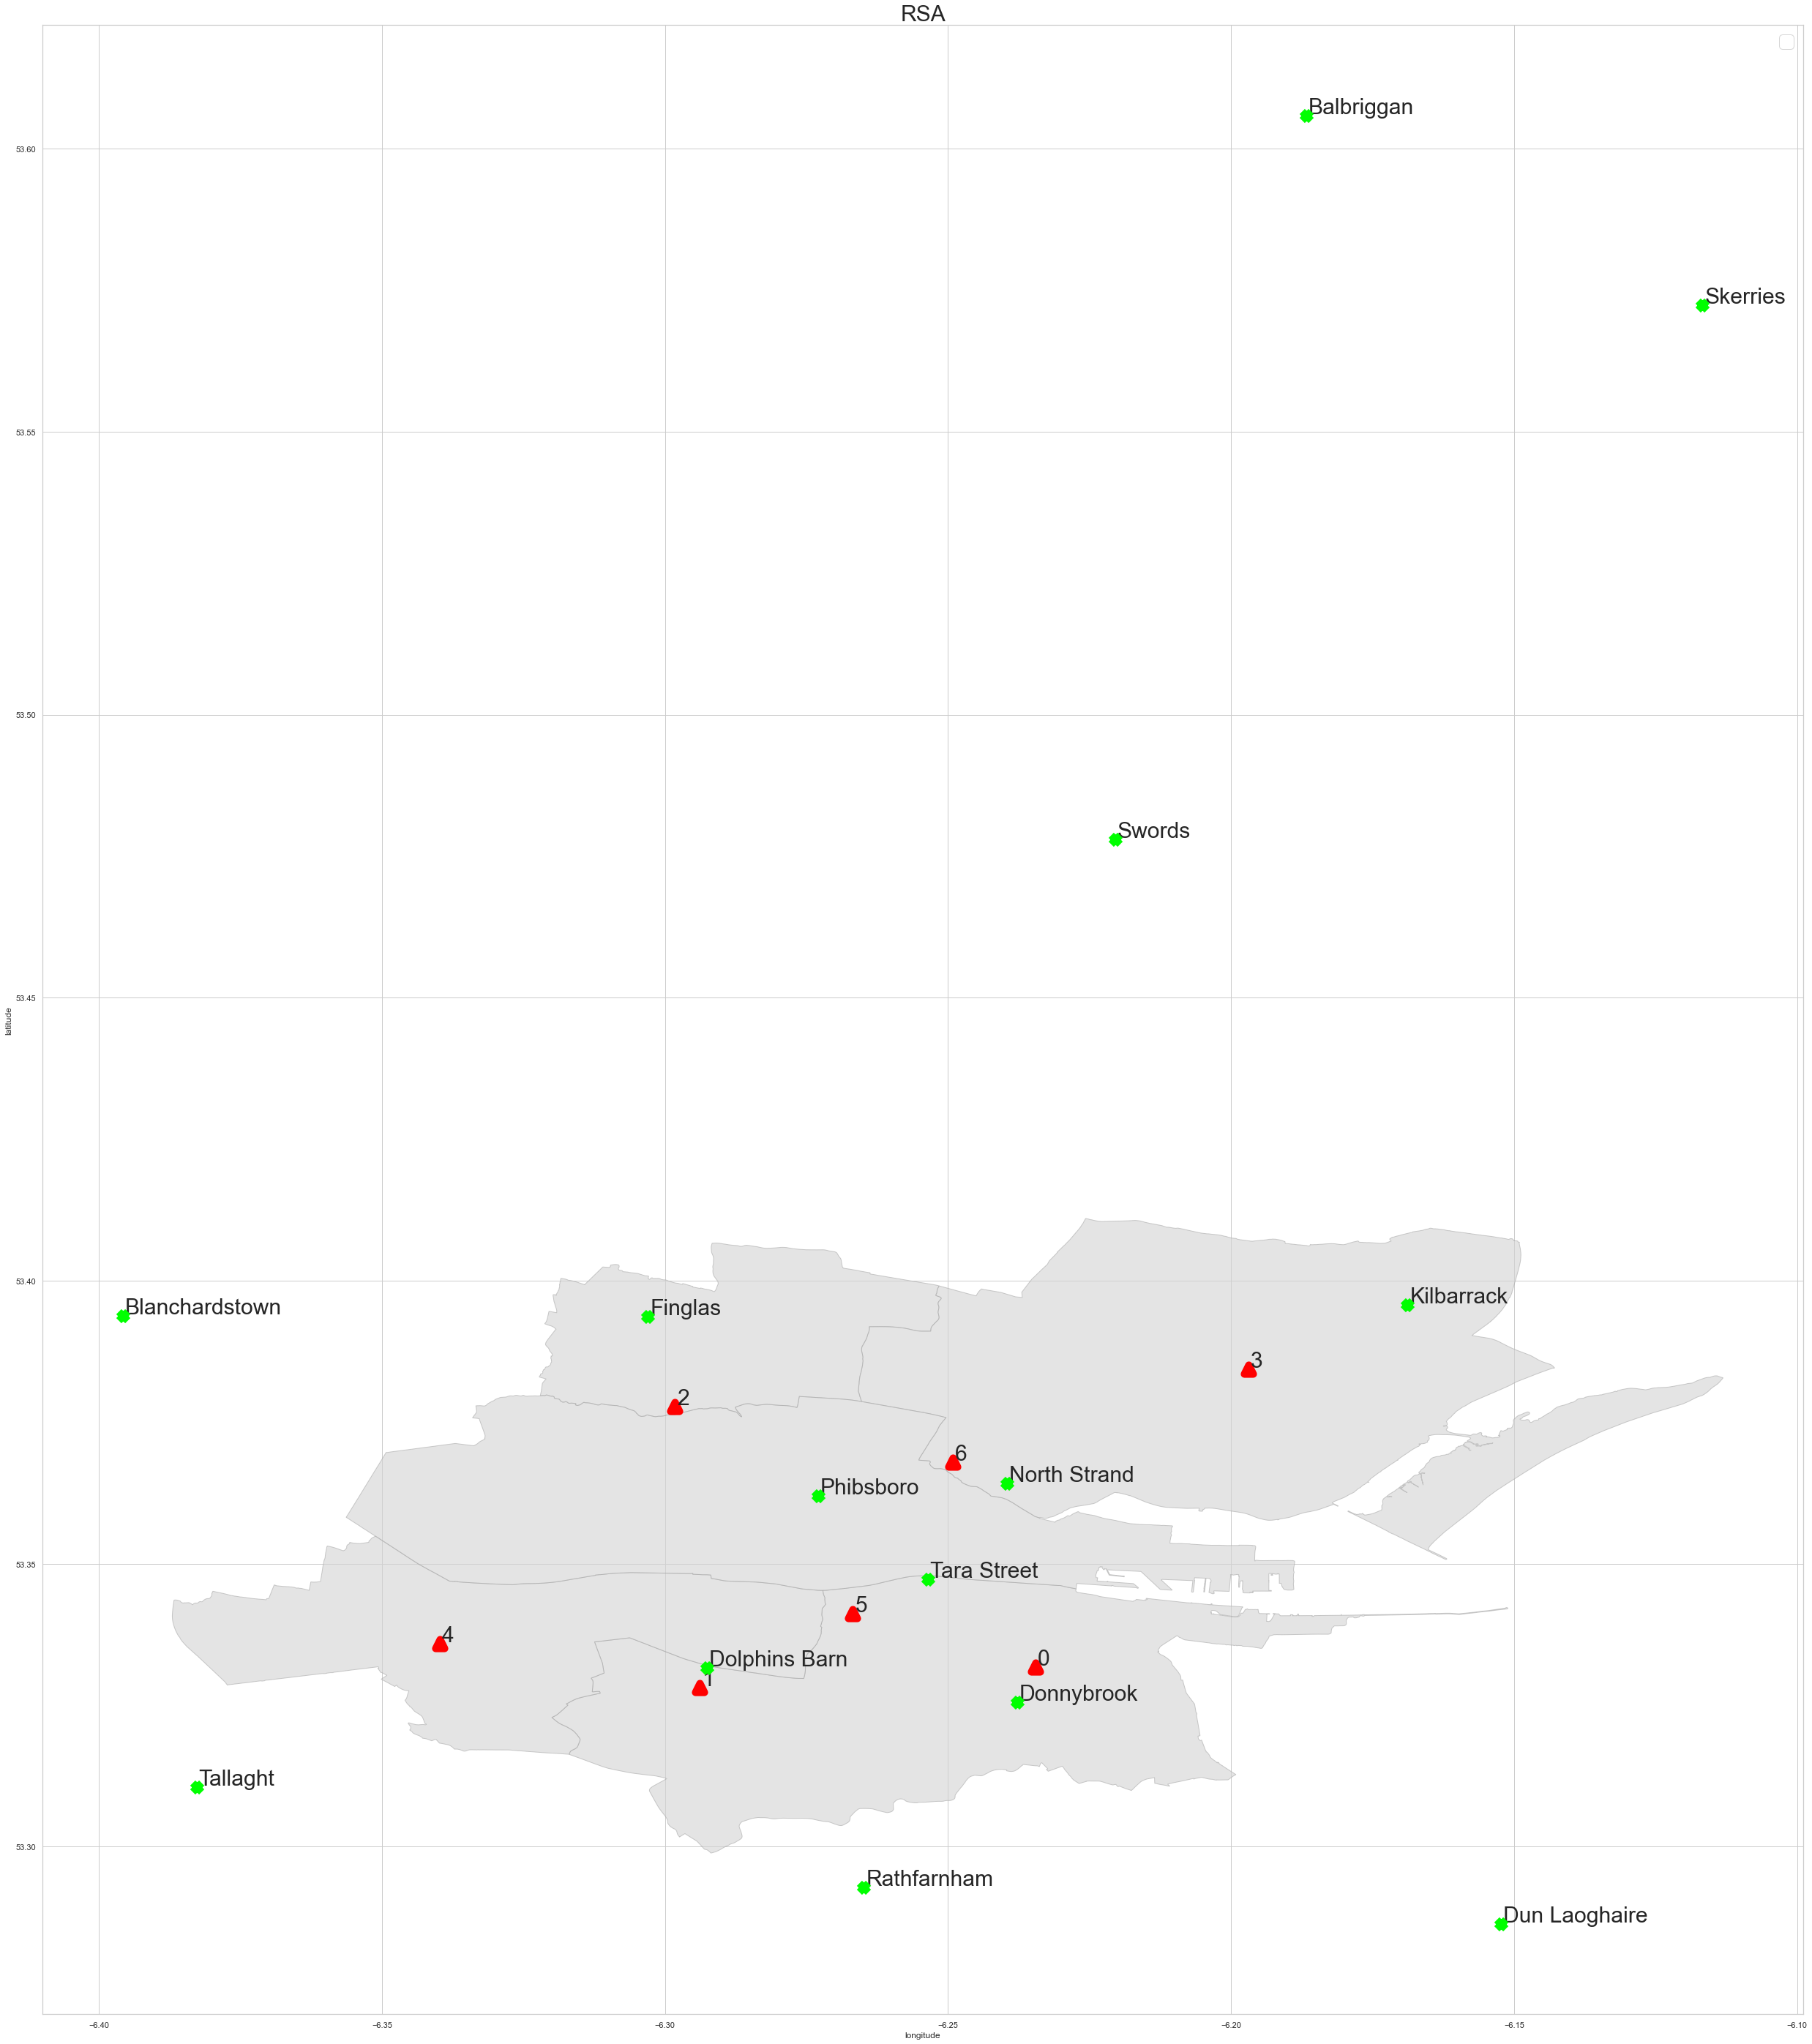

In [56]:
# Compare cluster centers with fire and ambulance services
rsa.plot_on_dublin_map_cluster(hue='knn_cluster', cluster_centers=centers_df, dcc_admin_gdf=dublin_gdf, fire_ambulance_gpf=fire_station_gpf);

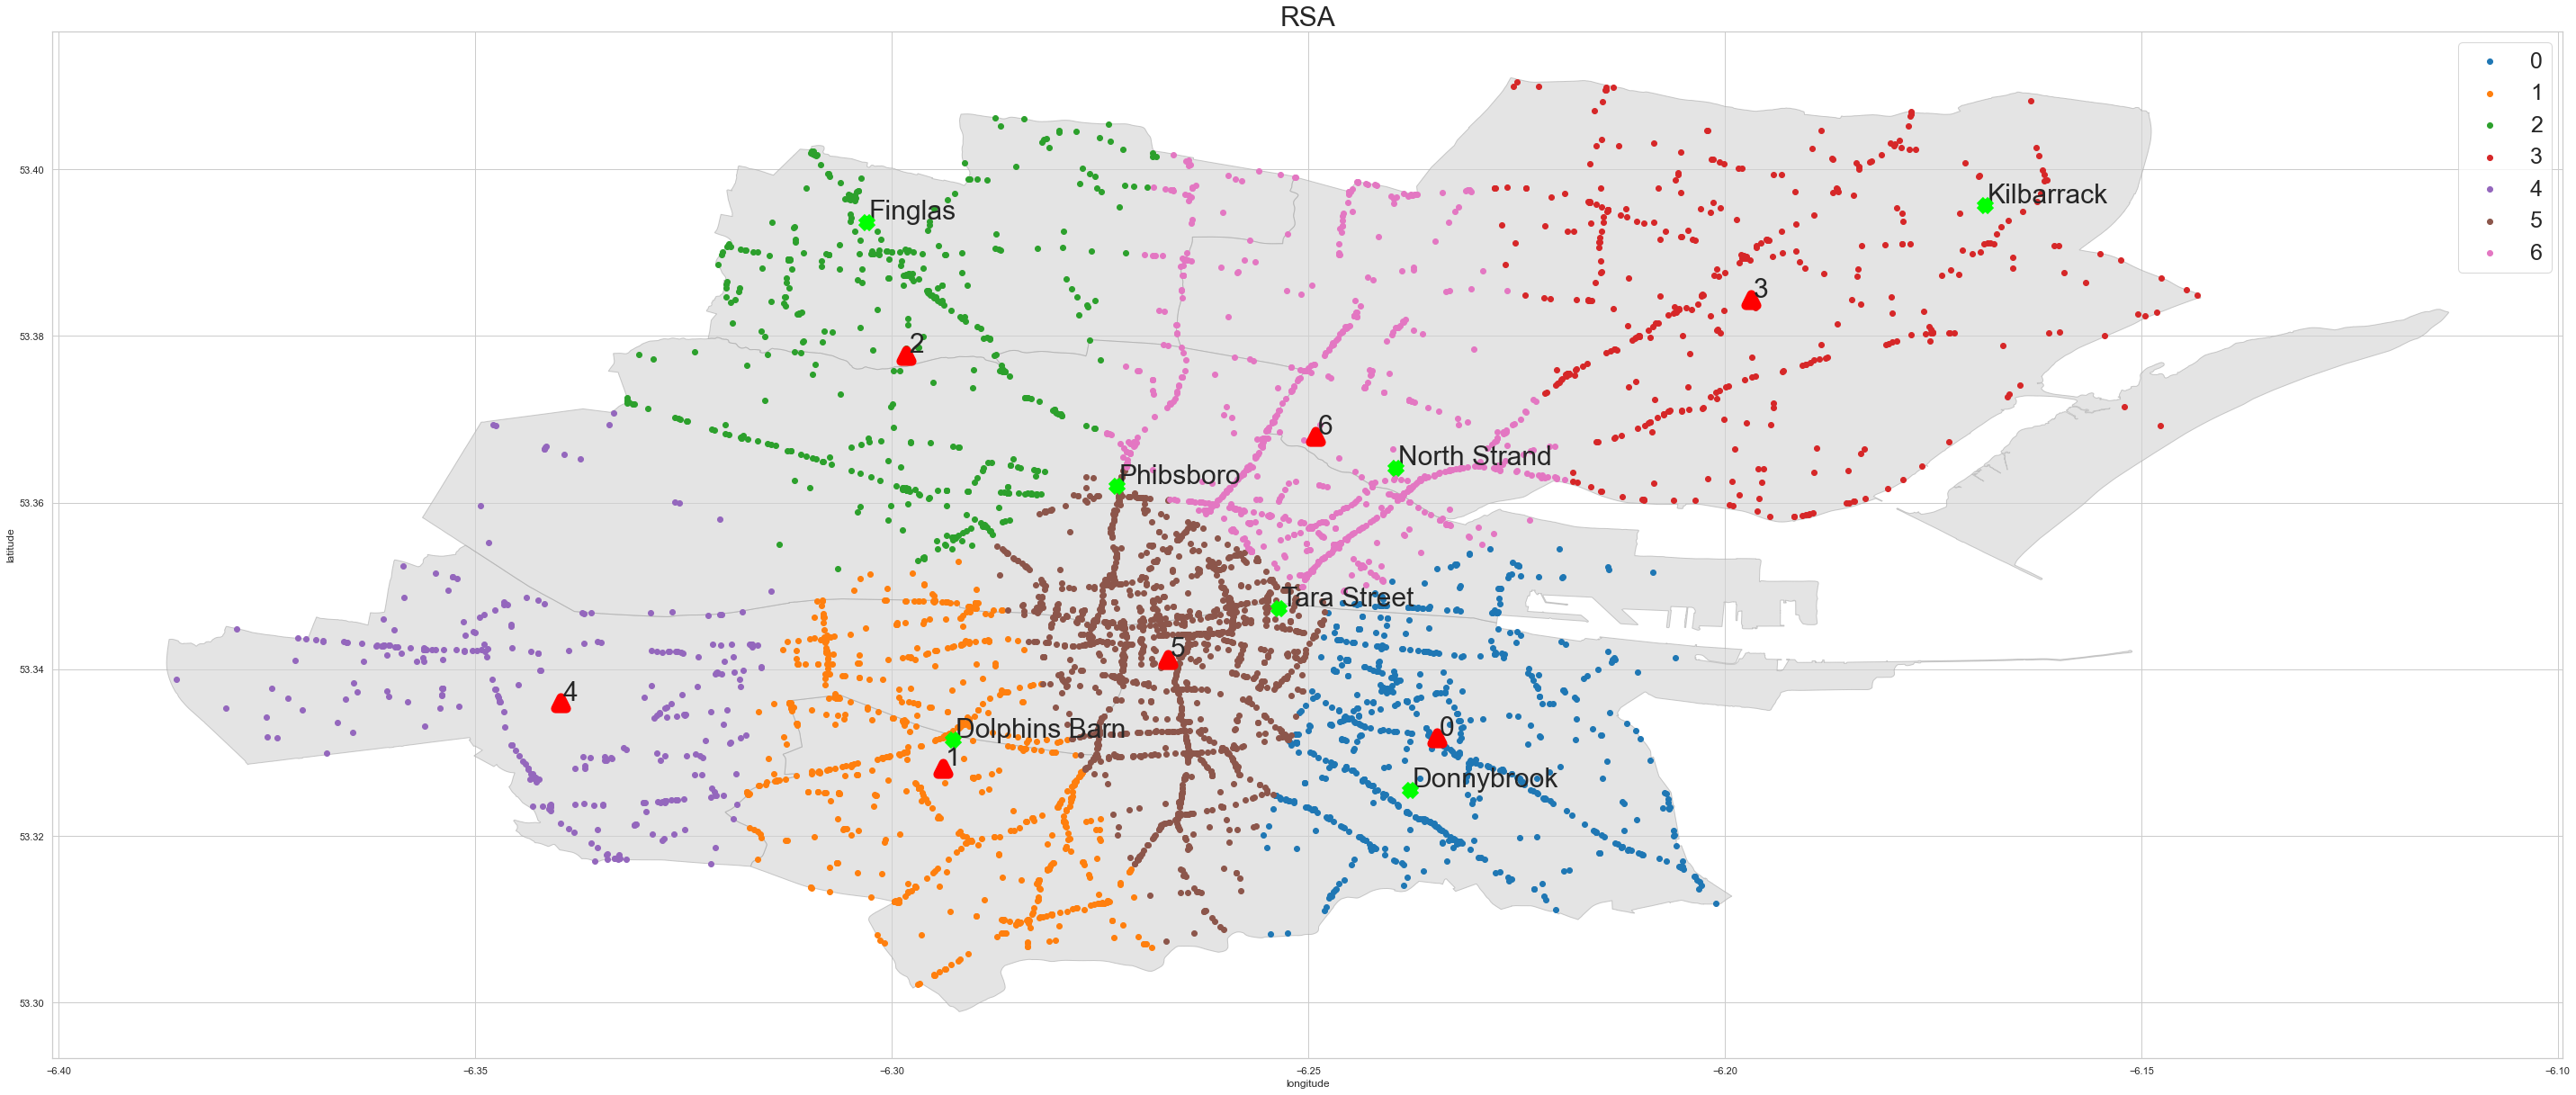

In [57]:
rsa.plot_on_dublin_map_cluster(
    gdf=rsa.convert_df_labels(dcc_geo_df), 
    hue='knn_cluster',
    cluster_centers=centers_df, 
    dcc_admin_gdf=dublin_gdf,
    fire_ambulance_gpf=fire_station_gpf[fire_station_gpf.is_dcc==True],
    save_to_file="rsa/visualization/images/img11_rsa_cluster_classification.png"
    );

### Calculate closest distance to Firebrigade

In [58]:
dcc_geo_df[['fbs_distance_m', 'fbs_station']] = dcc_geo_df.apply(lambda x: rsa.geo_distance_to_closest_fire_station((x.latitude, x.longitude), fire_station_gpf), axis=1)

# Firebrigade and Ambulance

Dataset:

|DFB AMBULANCE	    |Desc|
|-------------------|----|
|Date	            |Date of incident|
|Station Area	    |Location of incident by fire station area|
|Clinical Status	|Critically of medical incident|
|TOC	            |Time of Call|
|ORD	            |Time 1st appliance ordered|
|MOB	            |Time 1st appliance mobile (to incident)|
|IA	                |Time 1st appliance In Attendance (at scene)|
|LS	                |Time 1st appliance leaves scene|
|AH	                |Time 1st appliance books At Hospital|
|MAV	            |Time last appliance books Mobile and Available|
|CD	                |Time last appliance close down at station - Incident Closure|


Ambulance Code:

|Clinical       |Ref	|Critically	                        |Desc.|
|---------------|-------|-----------------------------------|-----|
|E	            |Echo	|Life threatening	                |Life threatening – Cardiac or respiratory arrest|
|D	            |Delta	|Life threatening	                |Life threatening other than cardiac or respiratory arrest|
|C	            |Charlie|Serious not life threatening	    |Serious not life threatening – immediate|
|B	            |Bravo	|Serious not life threatening	    |Serious not life threatening – urgent|
|A	            |Alpha	|Non serious or life threatening	|Non serious or non life threatening|
|O	            |Omega	|Non serious or life threatening	|Minor illness or injury|
|Not classed	|Non	|Not logged on ProQa	            |Not Logged on ProQa|



In [59]:
# Ambulance response time
# https://data.smartdublin.ie/dataset/19a0948f-9505-49db-b399-226a8bcc1493/resource/e1c6721b-09c3-4e2a-bb27-b37ca75a9fed/download/dccfirebrigadeambulanceincidents2012.csv
fbs_2012_df = pd.read_excel("rsa/data/firebrigade/dccfirebrigadeambulanceincidents2012.xlsx")

In [60]:
fbs_2012_df.columns

Index(['Date', 'Station Area', 'Description', 'TOC', 'ORD', 'MOB', 'IA', 'LS',
       'AH', 'MAV', 'CD', 'Time_Arrival_At_Scene'],
      dtype='object')

In [61]:
fbs_2012_df.head()

Date   Station Area Description                 TOC  \
0 2012-01-01 00:12:00  Dolphins Barn       Delta 2012-01-01 00:12:00   
1 2012-01-01 00:13:00  Dolphins Barn       Alpha 2012-01-01 00:13:00   
2 2012-01-01 00:20:00      Phibsboro       Omega 2012-01-01 00:20:00   
3 2012-01-01 00:27:00     Kilbarrack       Bravo 2012-01-01 00:27:00   
4 2012-01-01 00:30:00  Dolphins Barn       Bravo 2012-01-01 00:30:00   

                  ORD                 MOB                  IA  \
0 2012-01-01 00:14:00 2012-01-01 00:14:00 2012-01-01 00:17:00   
1 2012-01-01 00:16:00 2012-01-01 00:17:00 2012-01-01 00:23:00   
2 2012-01-01 00:24:00 2012-01-01 00:26:00 2012-01-01 00:31:00   
3 2012-01-01 00:29:00 2012-01-01 00:31:00                 NaT   
4 2012-01-01 00:32:00 2012-01-01 00:32:00                 NaT   

                   LS                  AH                 MAV  \
0 2012-01-01 00:20:00                 NaT 2012-01-01 00:30:00   
1                 NaT 2012-01-01 00:38:00 2012-01-01 00:47:00   
2 2012-01-01 00:42:00 2012-01-01 00:46:00 2012-01-01 00:55:00   
3                 NaT 2012-01-01 00:45:00 2012-01-01 00:59:00   
4                 NaT                 NaT 2012-01-01 00:44:00   

                   CD  Time_Arrival_At_Scene  
0 2012-01-01 00:32:00                      5  
1 2012-01-01 00:51:00                     10  
2 2012-01-01 01:04:00                     11  
3 2012-01-01 01:00:00                     -1  
4 2012-01-01 00:45:00                     -1

In [62]:
columns = ['date', 'station', 'description', 'time_arrival_at_scene']
fbs_2012_df = fbs_2012_df[['Date', 'Station Area', 'Description', 'Time_Arrival_At_Scene']]
fbs_2012_df.columns = columns

In [63]:
fbs_2012_df.isnull().sum()

date                     0
station                  0
description              0
time_arrival_at_scene    0
dtype: int64

Time Arrival At scene Outliers and Normalization

In [64]:
fbs_2012_df.time_arrival_at_scene.describe()

count    71414.000000
mean        12.865237
std         12.833569
min        -52.000000
25%          7.000000
50%         11.000000
75%         16.000000
max        310.000000
Name: time_arrival_at_scene, dtype: float64

In [65]:
# remove nulls
fbs_2012_df.dropna(subset=['time_arrival_at_scene'], inplace=True)
fbs_2012_df.drop(fbs_2012_df[fbs_2012_df['time_arrival_at_scene']<=0].index, inplace=True)

Time arrival at scene remove outliers

<AxesSubplot:ylabel='time_arrival_at_scene'>

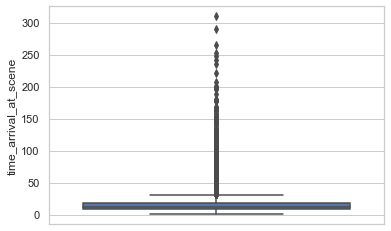

In [66]:
sns.boxplot(y=fbs_2012_df.time_arrival_at_scene)

In [67]:
# For comparison with study on 1997 for urban areas: 44% of calls received a response within 9 minutes
print(f"44% of calls received in 2012 recieved a response of {fbs_2012_df.time_arrival_at_scene.quantile(0.44)}")

44% of calls received in 2012 recieved a response of 11.0


In [68]:
# Calculate IQR and values find valus outside of the range
Q1 = fbs_2012_df.time_arrival_at_scene.quantile(0.25)
Q3 = fbs_2012_df.time_arrival_at_scene.quantile(0.75)
IQR = Q3-Q1 #IQR (Interquartile Range)
Minimum = Q1 - 1.5 * IQR
Maximum = Q3 + 1.5 * IQR
print(f"IQR: {IQR}, Minimum: {Minimum}, Maximum: {Maximum}")

IQR: 9.0, Minimum: -4.5, Maximum: 31.5


In [69]:
fbs_2012_outliers_df =  fbs_2012_df[  (fbs_2012_df.time_arrival_at_scene < Minimum) | (fbs_2012_df.time_arrival_at_scene > Maximum)   ]
fbs_2012_df = fbs_2012_df.drop(fbs_2012_outliers_df.index)

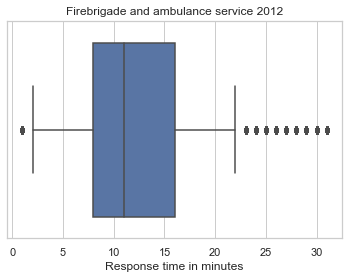

In [70]:
ax = sns.boxplot(x=fbs_2012_df.time_arrival_at_scene, whis=.75).set(
    xlabel="Response time in minutes",
    title="Firebrigade and ambulance service 2012")
plt.savefig("rsa/visualization/images/img2_boxplot_response_time.png")

In [71]:
fbs_2012_df.time_arrival_at_scene.mean()

12.770733012306046

In [72]:
fbs_2012_df.station.unique()

array(['Dolphins Barn', 'Phibsboro', 'Tara Street', 'Tallaght',
       'Donnybrook', 'Kilbarrack', 'Skerries', 'Swords', 'Finglas',
       'Blanchardstown', 'Rathfarnham', 'North Strand', 'Dun Laoghaire',
       'Balbriggan'], dtype=object)

In [73]:
fbs_avg_df = pd.DataFrame(fbs_2012_df.groupby(['station'])['time_arrival_at_scene'].mean()).reset_index()
fbs_avg_df

station  time_arrival_at_scene
0       Balbriggan              20.384279
1   Blanchardstown              13.882105
2    Dolphins Barn              11.601298
3       Donnybrook              11.589993
4    Dun Laoghaire              12.793388
5          Finglas              13.245679
6       Kilbarrack              13.368729
7     North Strand              11.685397
8        Phibsboro              11.675966
9      Rathfarnham              12.657170
10        Skerries              21.200000
11          Swords              14.969461
12        Tallaght              14.616309
13     Tara Street              10.399604

array([[<AxesSubplot:title={'center':'time_arrival_at_scene'}>]],
      dtype=object)

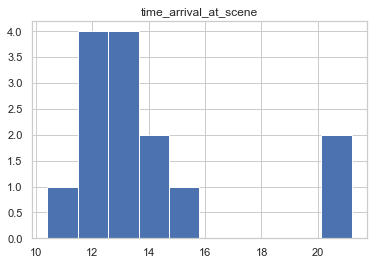

In [74]:
fbs_avg_df.hist()

From the RSA dataset include average distance to scene

In [75]:
dcc_avg_dist_df = pd.DataFrame(dcc_geo_df.groupby(['fbs_station'])['fbs_distance_m'].mean()).reset_index()
dcc_avg_dist_df

fbs_station  fbs_distance_m
0  Dolphins Barn     1592.365908
1     Donnybrook     1292.570507
2        Finglas     1621.258967
3     Kilbarrack     2072.275435
4   North Strand     1611.383578
5      Phibsboro     1121.154916
6    Rathfarnham     2155.570614
7       Tallaght     3464.405917
8    Tara Street      967.637805

array([[<AxesSubplot:title={'center':'fbs_distance_m'}>]], dtype=object)

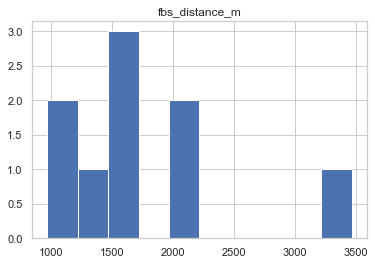

In [76]:
dcc_avg_dist_df.hist()

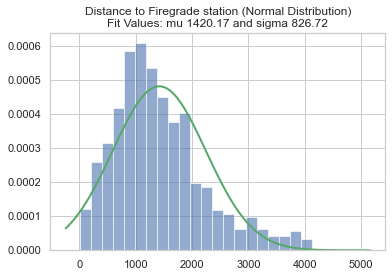

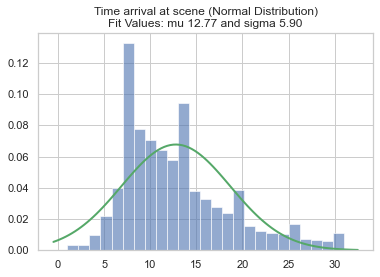

In [77]:
rsa.plot_normal_dist(dcc_geo_df.fbs_distance_m, "Distance to Firegrade station (Normal Distribution)", "rsa/visualization/images/img3_hist_normal_distance_fbs.png")
rsa.plot_normal_dist(fbs_2012_df.time_arrival_at_scene, "Time arrival at scene (Normal Distribution)", "rsa/visualization/images/img4_hist_response_time_fbs.png")

Using normal distribution for response time and distance to station. We can create an indicator of the estimate response time for each causalty, based associated station.

In [78]:
from scipy import stats 
def get_estimated_response_time(distance: float, station: str):
    D_mu, _ = stats.norm.fit(dcc_geo_df[dcc_geo_df.fbs_station == station].fbs_distance_m)
    RT_mu, _ = stats.norm.fit(fbs_2012_df[fbs_2012_df.station == station].time_arrival_at_scene)
    # Simplre rule of three
    # a -> b
    # c -> x
    # x = (b * c) / a
    a = D_mu
    b = RT_mu
    c = distance
    return (b * c) / a


dcc_geo_df['fbs_estimated_response_time'] = dcc_geo_df.apply(lambda row: get_estimated_response_time(row.fbs_distance_m, row.fbs_station), axis=1)

In [79]:
dcc_geo_df[['id','fbs_distance_m','fbs_station','fbs_estimated_response_time']].head()

id  fbs_distance_m    fbs_station  fbs_estimated_response_time
0   79928     1765.472596  Dolphins Barn                    12.862480
3   83409     1460.494119  Dolphins Barn                    10.640537
5   83183      732.343359     Donnybrook                     6.566647
10  83108     2473.486573        Finglas                    20.208375
11  80345      723.822684    Tara Street                     7.779222

In [80]:
dcc_geo_df.fbs_station.unique()

array(['Dolphins Barn', 'Donnybrook', 'Finglas', 'Tara Street',
       'North Strand', 'Phibsboro', 'Kilbarrack', 'Rathfarnham',
       'Tallaght'], dtype=object)

In [81]:
#map station to id values
def map_fbs(station:str):
    for key, value in rsa.dictionaries.FIREBRIGADE_STATION.items():
        if station == value:
            return key
    return -1
    
dcc_geo_df['fbs_station'] = dcc_geo_df.fbs_station.apply(map_fbs)

In [82]:
dcc_geo_df.head()

id  year  weekday  hour  splimit  gender  age  county  vehicle_type  \
0   79928  2016        7     4       50       1    6       6             1   
3   83409  2016        3     3       50       1    8       6             6   
5   83183  2016        6     1       50       2    8       6             3   
10  83108  2016        2     3       50       2    5       6             3   
11  80345  2016        5     5       30       1    7       6             5   

    circumstances  ...  longitude  total_casualties  outcome_calculated  \
0              10  ...  -6.289952               1.0                   3   
3               1  ...  -6.282953               1.0                   3   
5               1  ...  -6.235447               1.0                   3   
10              6  ...  -6.266328               2.0                   3   
11              1  ...  -6.261153               1.0                   3   

    is_fatal  severity                   geometry knn_cluster  fbs_distance_m  \
0      False       0.0  POINT (-6.28995 53.34735)           1     1765.472596   
3      False       0.0  POINT (-6.28295 53.34335)           5     1460.494119   
5      False       0.0  POINT (-6.23545 53.33196)           0      732.343359   
10     False       0.0  POINT (-6.26633 53.39753)           6     2473.486573   
11     False       0.0  POINT (-6.26115 53.35195)           5      723.822684   

    fbs_station  fbs_estimated_response_time  
0             2                    12.862480  
3             2                    10.640537  
5             1                     6.566647  
10            5                    20.208375  
11            0                     7.779222  

[5 rows x 21 columns]

# GoSafe DCC

https://www.hsa.ie/eng/vehicles_at_work/driving_for_work/vehicle_risk_management_business_case_studies/go_safe_case_study_dec_2017.pdf

Overview: 

GoSafe is contracted by An Garda Síochána in conjunction with the Department of Justice to provide and
operate safety cameras in Ireland. The safety cameras are deployed in high-visibility vehicles primarily on
stretches of roads where there is a history of collisions. These are known as Collision Prone Zones (CPZ’s)
or Speed Enforcement Zones. We currently check the speed of over 2.5 million vehicles per month
throughout Ireland on a 24 hour basis with an emphasis on the times of the day, and days of the week that
accidents occur.

The challenge
We are required to operate on roads that are statistically the most dangerous in Ireland. Despite operating
in such a high-risk and potentially catastrophic working environment, GoSafe strives to be amongst the
safest companies operating on Irish roads.

In [83]:
# https://www.garda.ie/en/roads-policing/safety-camera-locations/zones-kmz-file-oct-2020.kmz
gp.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
gosafe_kmz = 'rsa/data/traffic-gosafe/zones-kmz-file-oct-2020.kml'
gosafe_df = gp.read_file(gosafe_kmz, driver='KML')
# Intersect with DCC
gosafe_df['is_dcc'] = gosafe_df.geometry.apply(lambda ml: rsa.geo_is_dcc(ml, dublin_gdf))
dcc_gosafe_df = gosafe_df[gosafe_df.is_dcc==True]

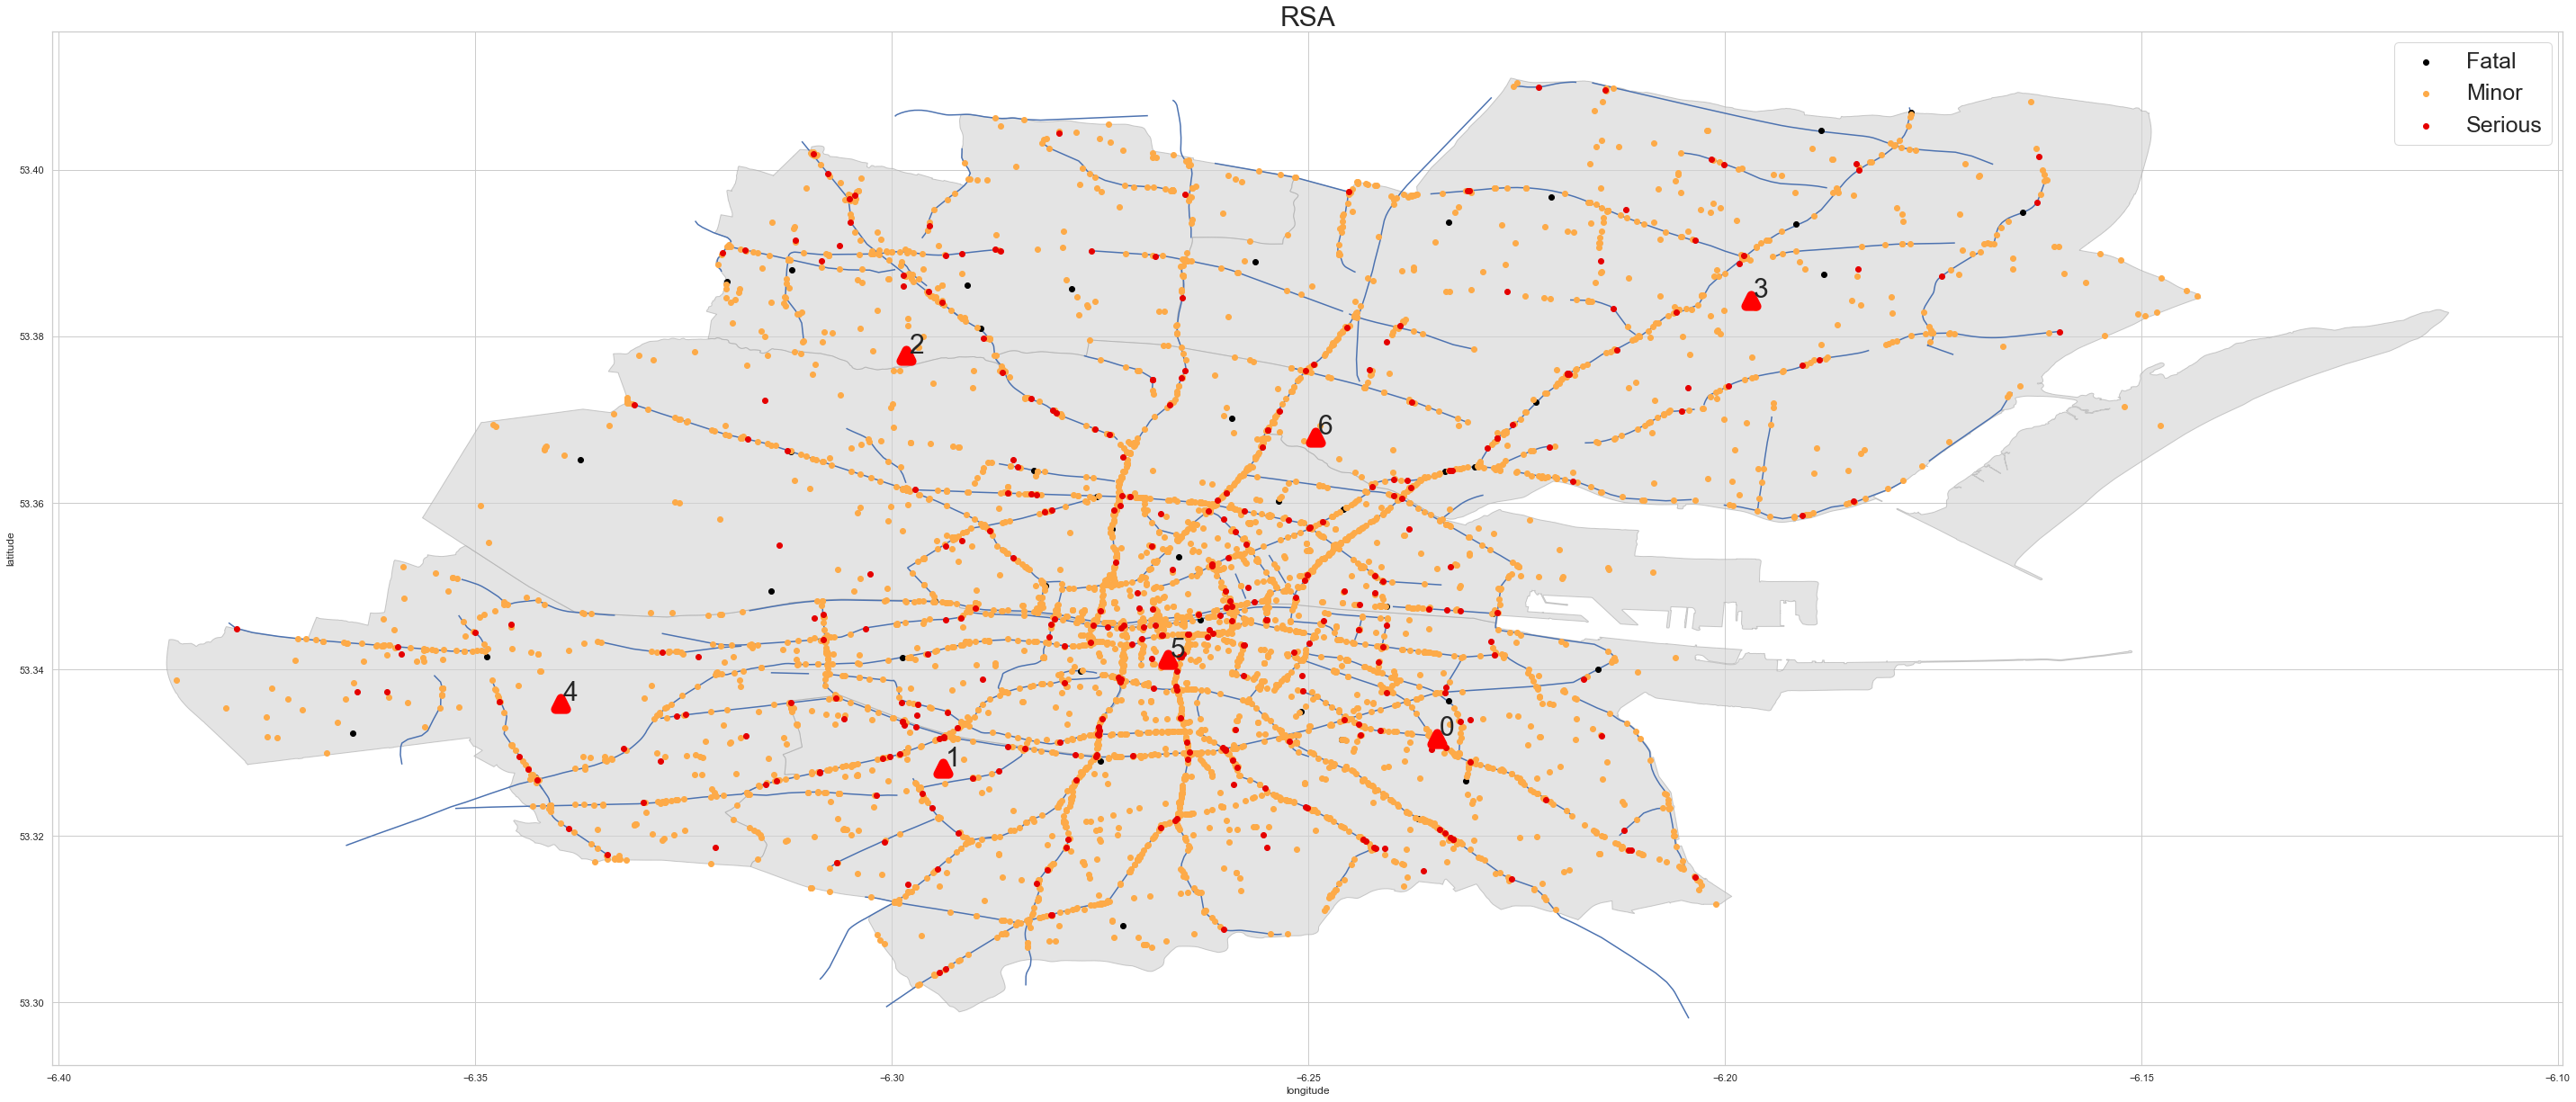

In [84]:
rsa.plot_on_dublin_map_cluster(
    gdf=rsa.convert_df_labels(dcc_geo_df),
    hue=rsa.enums.feature_names.OUTCOME_CALCULATED,
    cluster_centers=centers_df,
    dcc_admin_gdf=dublin_gdf,
    gosafe_gdf=dcc_gosafe_df);

To understand the impact of the gosafe initiative we will include new column in the RSA dataset indicting the accident occured on a monitored gosafe zone.

In [85]:
dcc_geo_df['is_gosafe'] = dcc_geo_df.geometry.apply(lambda point: rsa.geo_is_gosafe(point, gosafe_df))

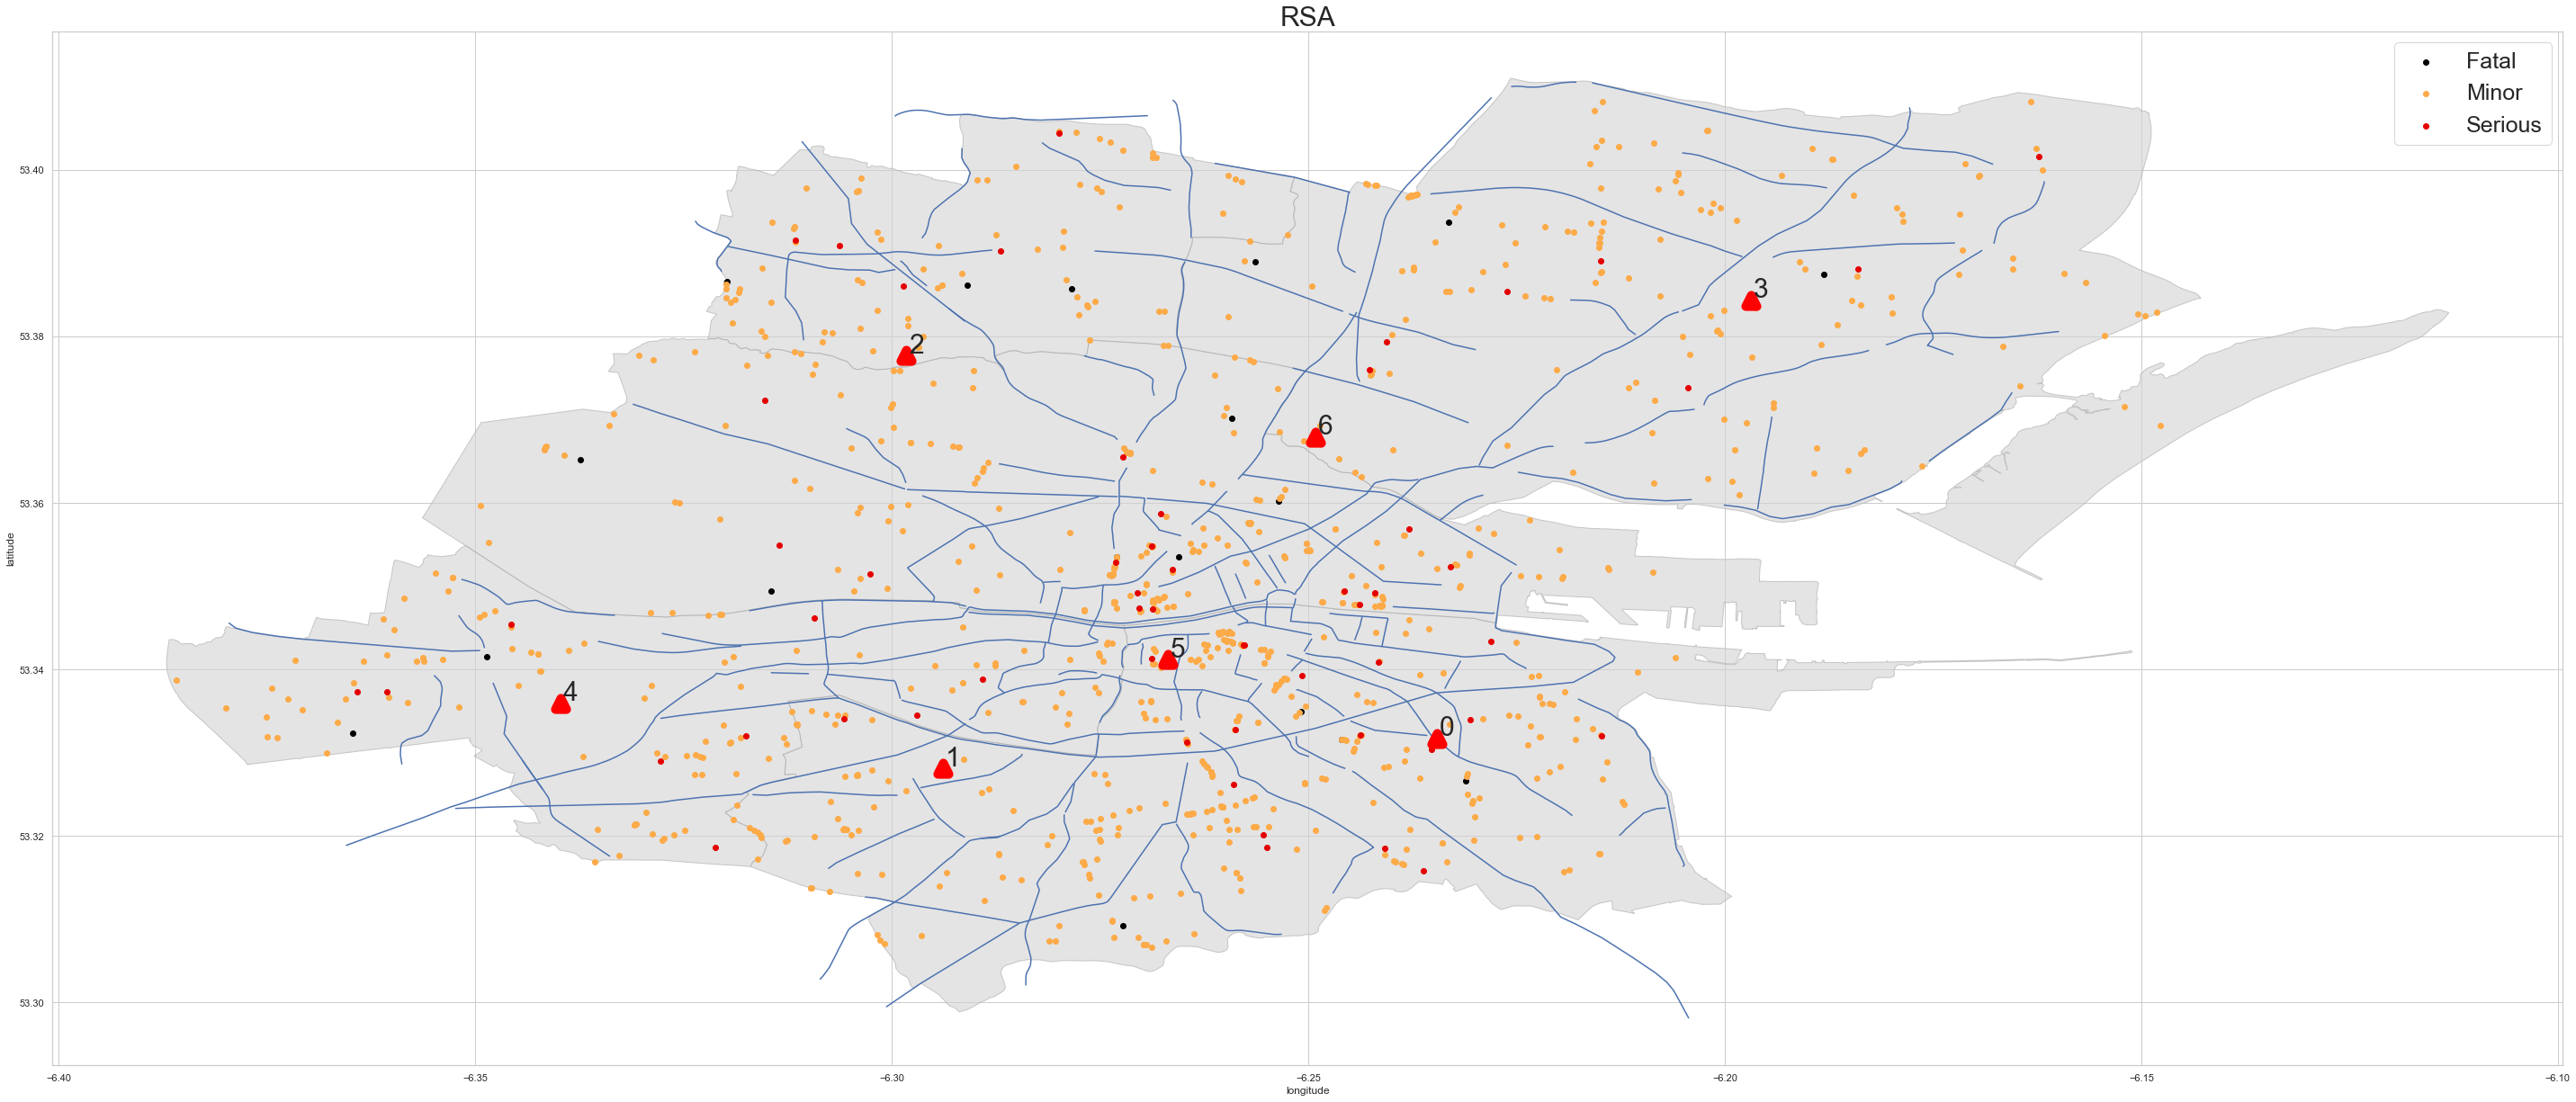

In [86]:
# Plot map without gosafe intersections
rsa.plot_on_dublin_map_cluster(
    gdf=rsa.convert_df_labels(dcc_geo_df),
    hue=rsa.enums.feature_names.OUTCOME_CALCULATED,
    cluster_centers=centers_df,
    dcc_admin_gdf=dublin_gdf,
    gosafe_gdf=dcc_gosafe_df,
    only_go_safe=False);    

# Severity

## High Severity

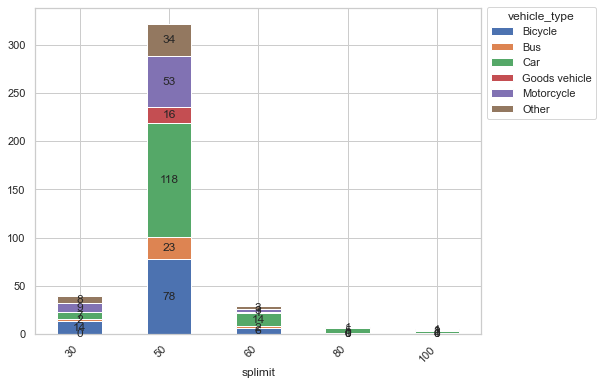

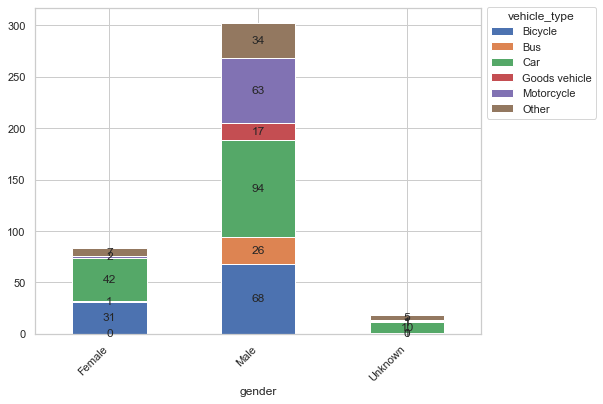

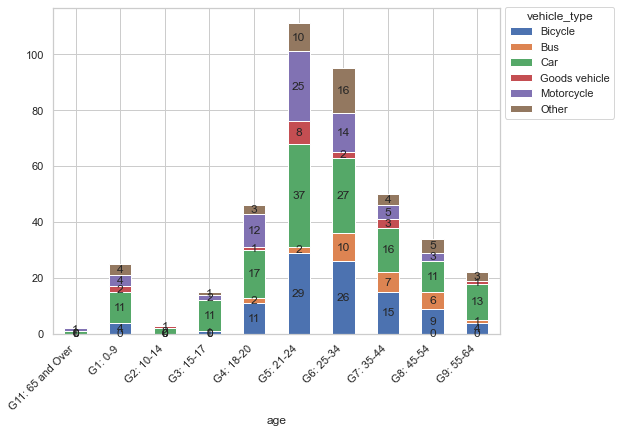

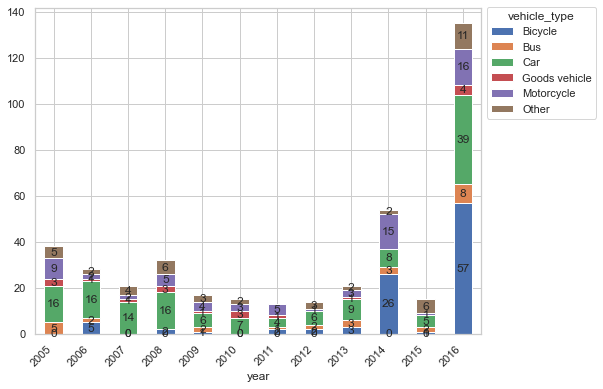

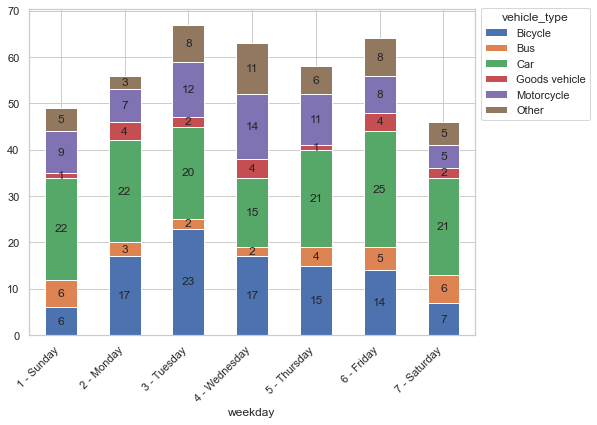

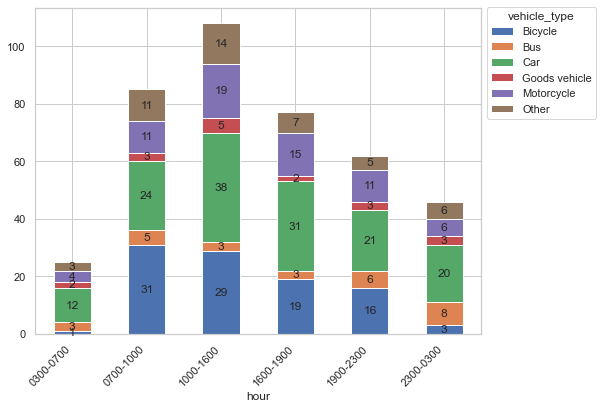

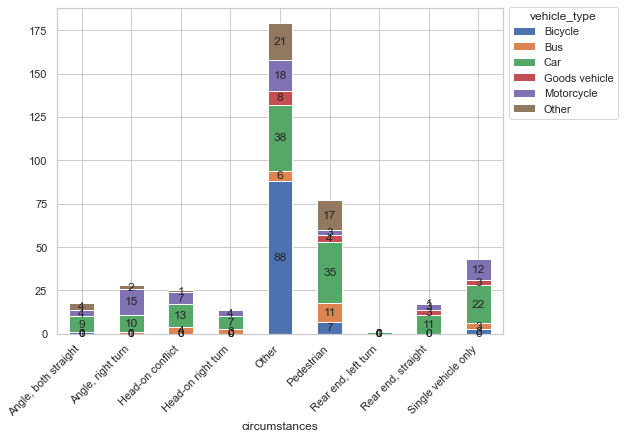

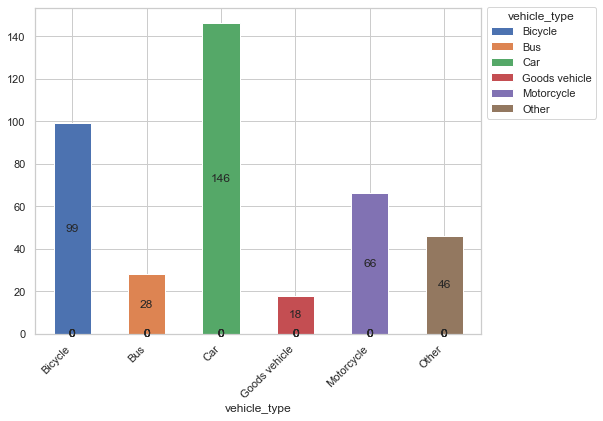

In [87]:
count = 12
for feature in rsa.enums.feature_names.listForAnalisys:
    count += 1
    save_to_file = f"rsa/visualization/images/img{str(count)}_hsctab_{feature}_by_vehicletype.png"
    rsa.plot_crosstab_feature_analysis_by_severity(dcc_geo_df, True, feature, rsa.enums.feature_names.VEHICLE_TYPE, True, save_to_file)

## Low Severity


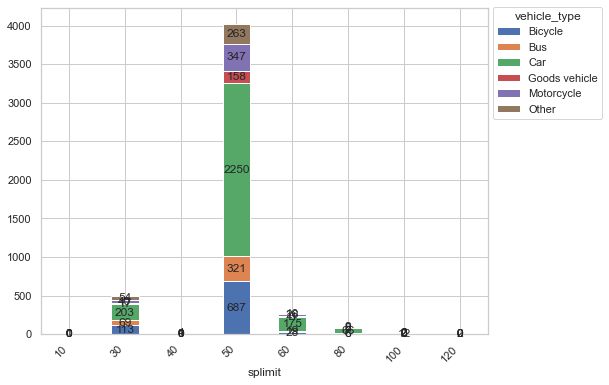

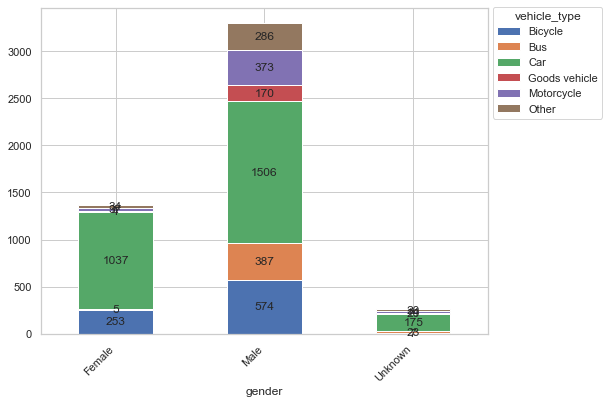

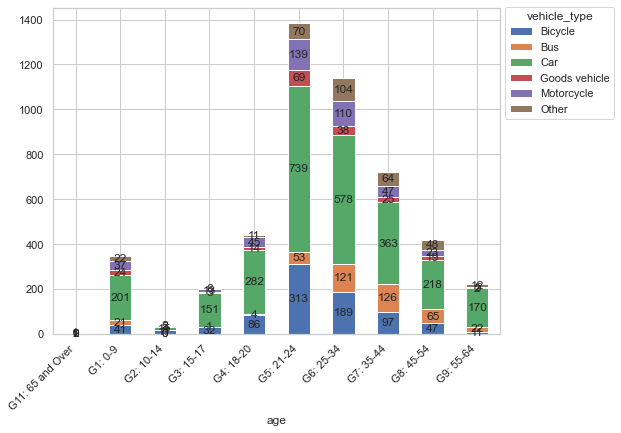

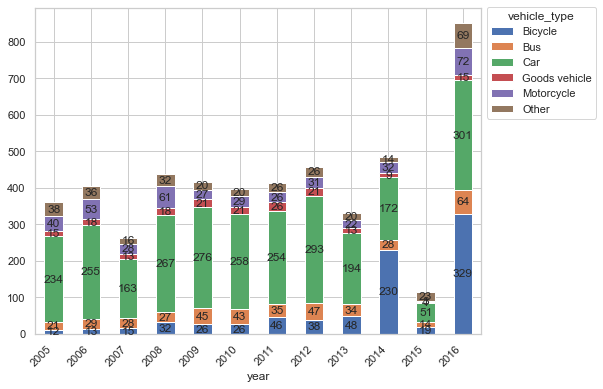

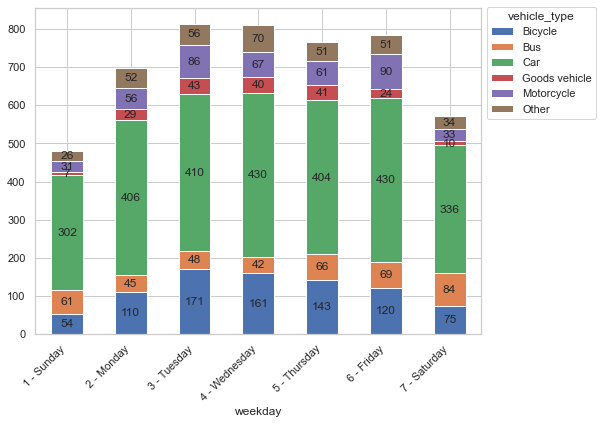

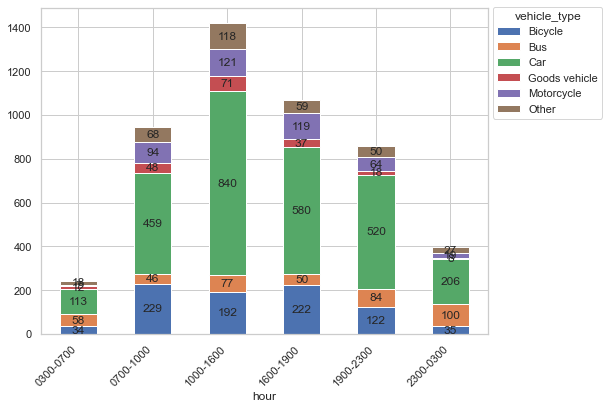

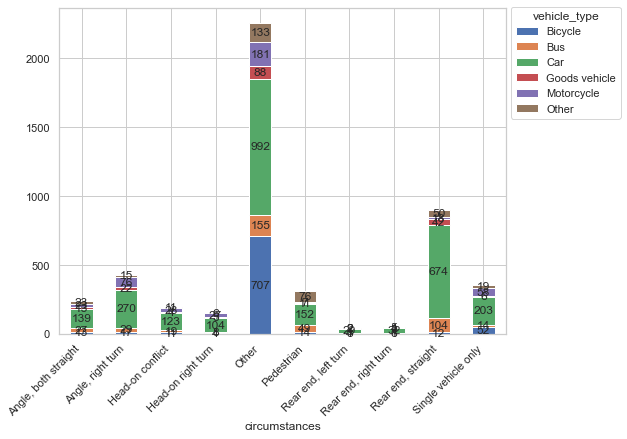

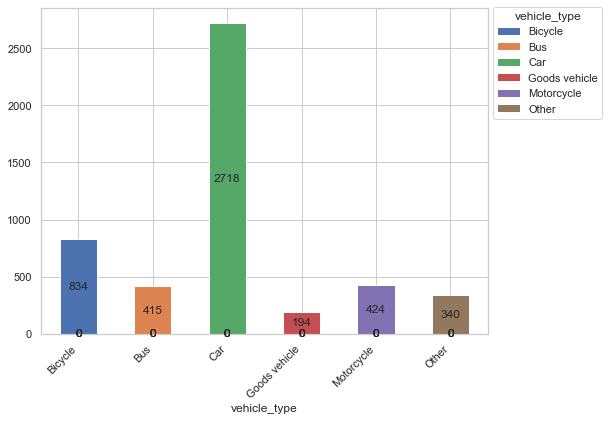

In [88]:
for feature in rsa.enums.feature_names.listForAnalisys:
    rsa.plot_crosstab_feature_analysis_by_severity(dcc_geo_df, False, feature, rsa.enums.feature_names.VEHICLE_TYPE, True)

# Safety Index.

Safety index is a computed value that takes into account the number of accidents occurred for a particular accident in radius of 500m. It's also used to determine the accident proneness of a particular location. Let's process the full dataset and genarate first count of accidents within 500m and then the safety index



<img src="rsa/visualization/images/img1_500m_Chapelizod_Bypass.png" width="800" height="400">

In [89]:
# Reset index of main dataset to id column
dcc_geo_df.set_index(rsa.enums.feature_names.ID, drop=True, inplace=True);

### Calculate radious_500 meters for the full dataset. This is to ensure edges on DCC have the proper values calculated.

In [90]:
# Save result to file to save calculation time. If required plase reomve the file to run distance calculation again it might take few minutes to complete
geo_df_safety_index_csv = "rsa/data/geo_df.csv"
geo_df = rsa.geo_calculate_radius(geo_df, geo_df_safety_index_csv)

# Add radious_500 column to dcc_geo_df
merge_df = pd.merge(dcc_geo_df.reset_index(), geo_df, how="inner",left_on="id", right_on="id")[["id","radius_500m"]]

load from file


In [91]:
# Add radius_500 column to dcc_geo_df
dcc_geo_df.reset_index(inplace=True)
dcc_geo_df = pd.merge(dcc_geo_df, merge_df, on=["id"])

In [92]:
# @TODO
#https://stackoverflow.com/a/40428356/7097297
#import pandas as pd
#import multiprocessing


# REF: ‘Computational efficiency and Amdahl’s law for the adaptive resolution simulation technique’ (2017). doi: 10.1016/j.cpc.2017.01.030.
# create as many processes as there are CPUs on your machine
#num_processes = multiprocessing.cpu_count()

# calculate the chunk size as an integer
#chunk_size = int(collisions_df.shape[0]/num_processes)

# https://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
# will work even if the length of the dataframe is not evenly divisible by num_processes
#print(f"Generate chunks for {num_processes} processes")
#chunks = [collisions_df.iloc[collisions_df.index[i:i + chunk_size]] for i in range(0, collisions_df.shape[0], chunk_size)]

#print(f"Dataset chunks {chunk_size}")

# create our pool with `num_processes` processes
#pool = multiprocessing.Pool(processes=num_processes)

# apply our function to each chunk in the list
#result = pool.map(test, chunks)
        
# Calculate total number of collistions
#collisions_df['total_number_accident_500m'] = collisions_df.apply(lambda x: total_number_accident_1km(x, collisions_df), axis=1)

## Analise radius_500m column

Find outliers and normalize to generate a Safety Index column. 

<AxesSubplot:ylabel='radius_500m'>

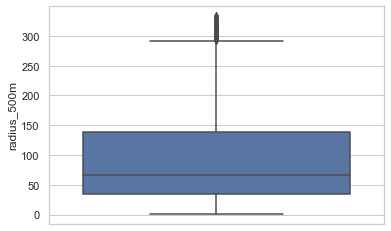

In [93]:
sns.boxplot(y=dcc_geo_df.radius_500m)
plt.savefig("rsa/visualization/images/img7_radius_500_boxplot.png")

In [94]:
# Calculate IQR and values find valus outside of the range
Q1 = dcc_geo_df.radius_500m.quantile(0.25)
Q3 = dcc_geo_df.radius_500m.quantile(0.75)
IQR = Q3-Q1 #IQR (Interquartile Range)
Minimum = Q1 - 1.5 * IQR
Maximum = Q3 + 1.5 * IQR
print(f"IQR: {IQR}, Minimum: {Minimum}, Maximum: {Maximum}")

IQR: 103.0, Minimum: -119.5, Maximum: 292.5


In [95]:
outliers_gdf =  dcc_geo_df[  (dcc_geo_df.radius_500m < Minimum) | (dcc_geo_df.radius_500m > Maximum)   ]
outliers_gdf.head(5)

id  year  weekday  hour  splimit  gender  age  county  vehicle_type  \
80   80251  2016        6     1       50       1    8       6             3   
147  79884  2016        5     2       30       1    6       6             6   
205  82452  2016        4     6       30       2    6       6             1   
270  79710  2016        7     4       50       1    1       6             6   
389  80642  2016        5     3       50       1    7       6             1   

     circumstances  ...  outcome_calculated  is_fatal  severity  \
80               7  ...                   3     False       0.0   
147              1  ...                   3     False       0.0   
205             10  ...                   3     False       0.0   
270              1  ...                   3     False       0.0   
389             10  ...                   3     False       0.0   

                      geometry  knn_cluster  fbs_distance_m fbs_station  \
80   POINT (-6.27181 53.34307)            5     1300.720680           0   
147  POINT (-6.26524 53.34537)            5      805.749296           0   
205  POINT (-6.26183 53.34628)            5      562.274057           0   
270  POINT (-6.27182 53.34390)            5     1271.203173           0   
389  POINT (-6.27019 53.34338)            5     1188.208787           0   

     fbs_estimated_response_time  is_gosafe  radius_500m  
80                     13.979383       True          321  
147                     8.659721       True          305  
205                     6.042992       True          298  
270                    13.662146       True          302  
389                    12.770171       True          309  

[5 rows x 23 columns]

## Plot outliers on the map

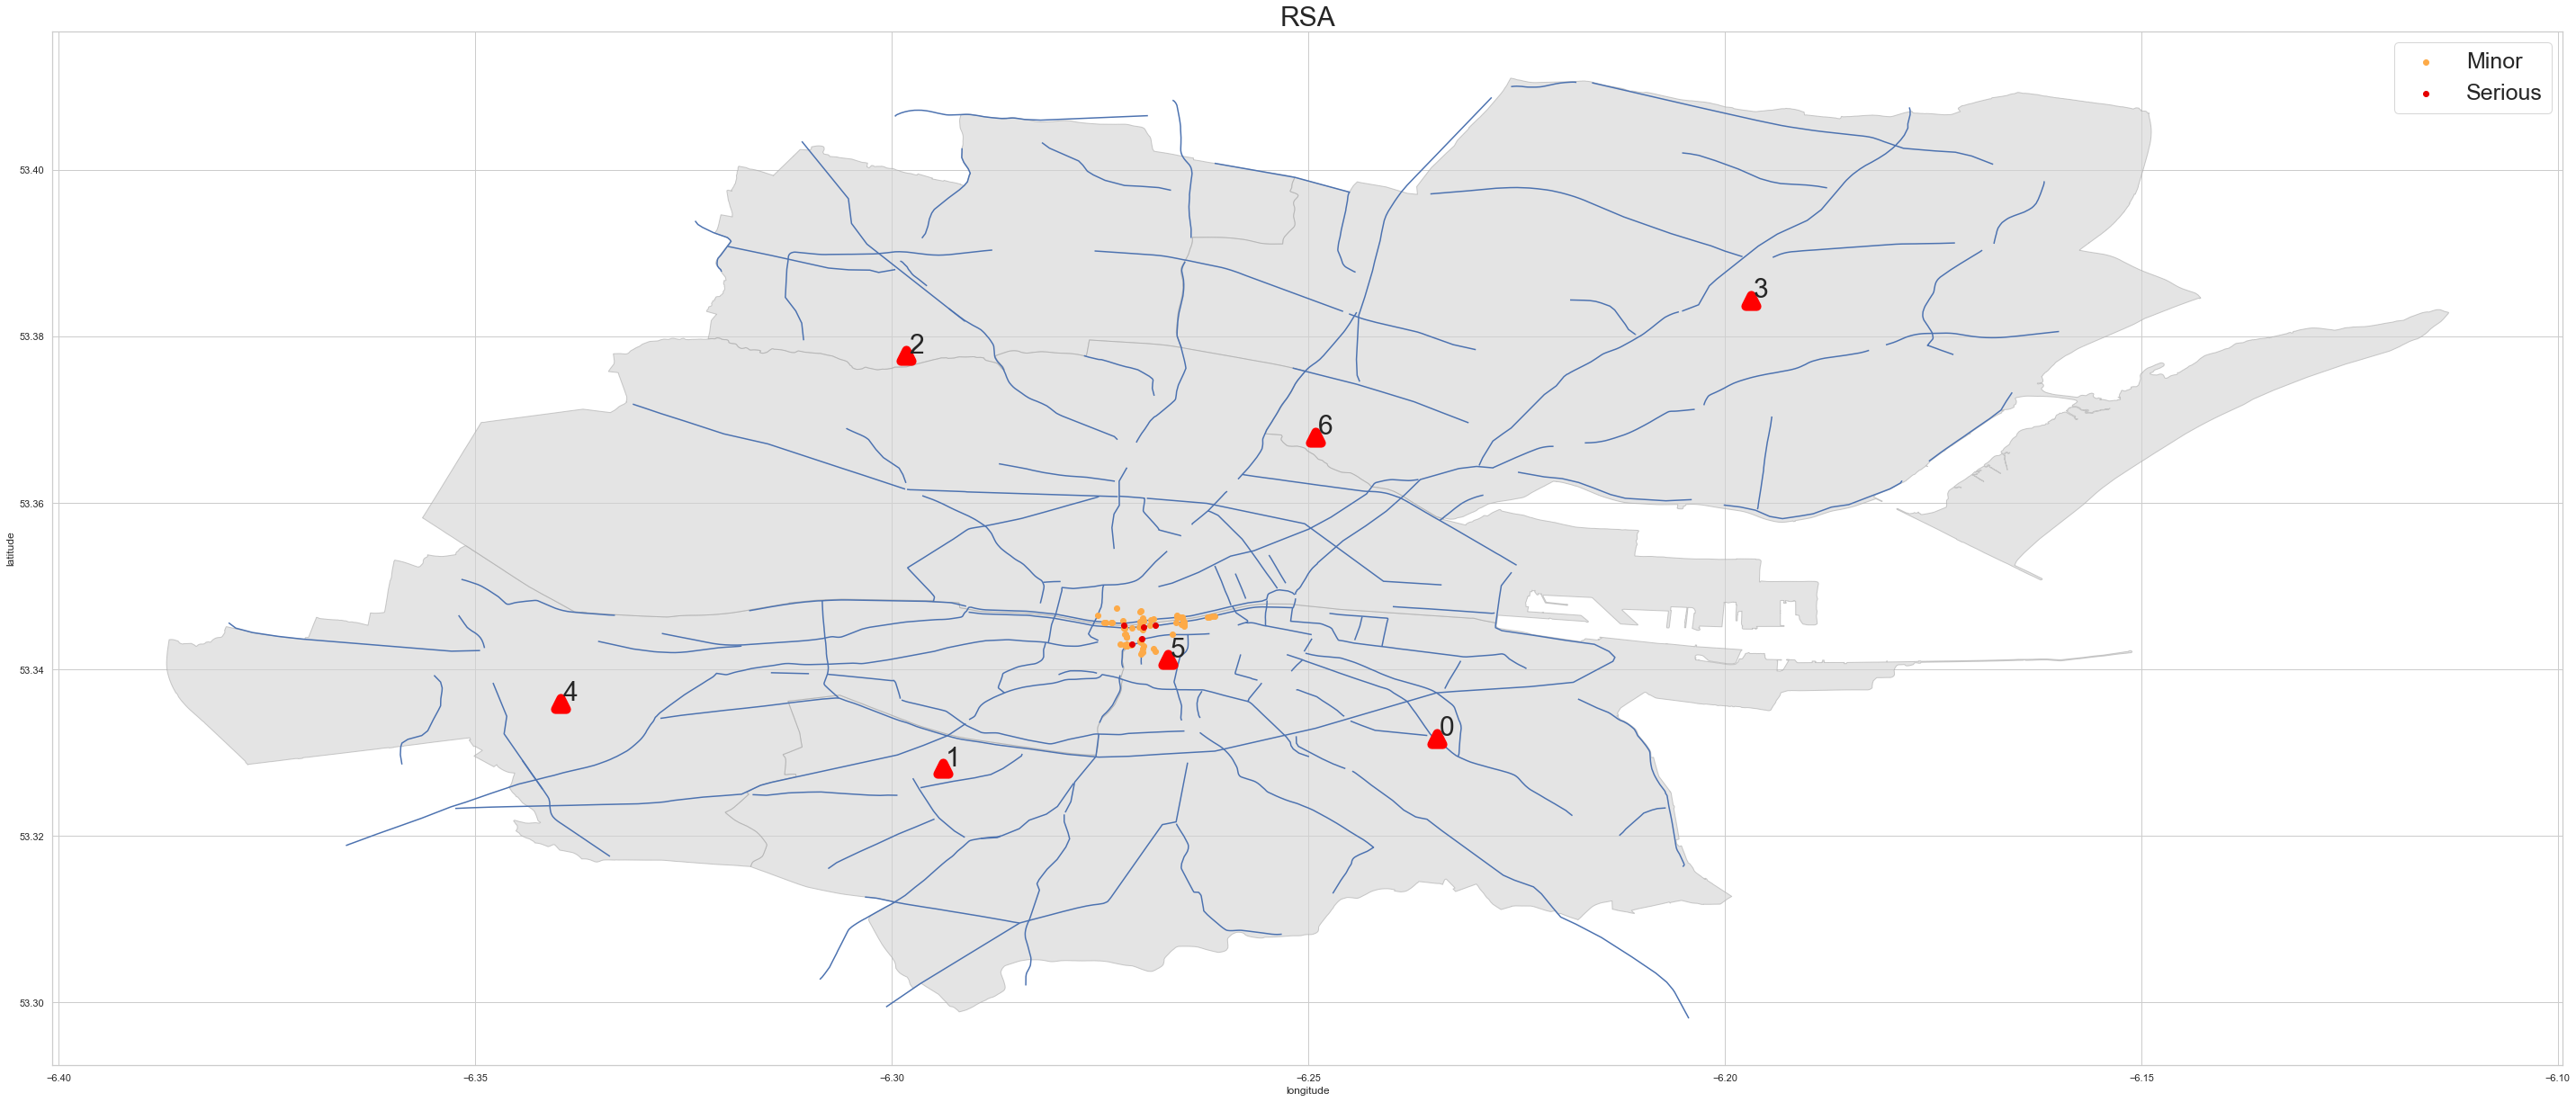

In [96]:
rsa.plot_on_dublin_map_cluster(
    gdf=rsa.convert_df_labels(outliers_gdf),
    hue=rsa.enums.feature_names.OUTCOME_CALCULATED,
    cluster_centers=centers_df,
    dcc_admin_gdf=dublin_gdf,
    gosafe_gdf=dcc_gosafe_df,
    save_to_file="rsa/visualization/images/img8_radius_500_outliers.png")


In [97]:
#Remove outliers
dcc_geo_df = dcc_geo_df.drop(outliers_gdf.index)

Update outliers to be in the range of the Interquartile Range max or min. The interpretation of the index for the max value it won't change. 
As it will still indicate that there is high or low prone to accidents on the area.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


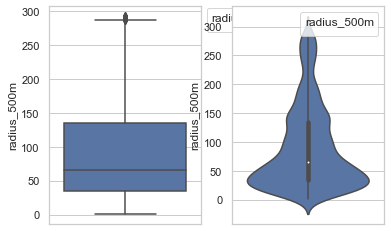

In [98]:
fig, (ax1, ax2) = plt.subplots(1,2);
sns.boxplot(y=dcc_geo_df.radius_500m, ax=ax1);
ax1.legend(title=f"radius_500m",  bbox_to_anchor=(1, 1.02), loc='upper left');
sns.violinplot(y=dcc_geo_df.radius_500m, ax=ax2);
ax2.legend(title=f"radius_500m");

## Analisys of distance to fire station

In [99]:
dcc_geo_df.fbs_distance_m.describe()

count    5245.000000
mean     1425.042069
std       831.922760
min         5.778145
25%       827.168846
50%      1283.919247
75%      1827.718788
max      4912.301418
Name: fbs_distance_m, dtype: float64

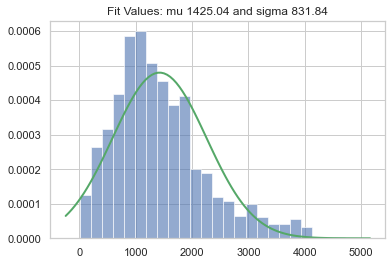

In [100]:
X = dcc_geo_df.fbs_distance_m.to_numpy();
rsa.plot_normal_dist(X)

## Scaling
Compare different scalers to be used for safety index

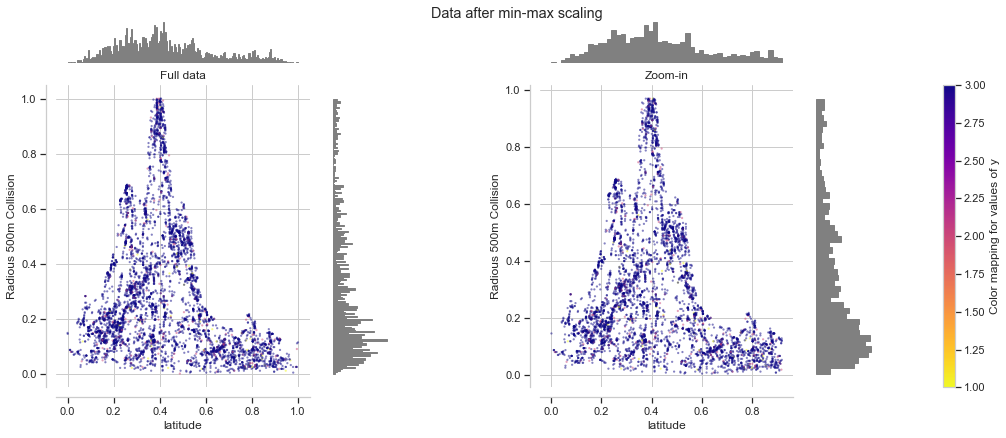

In [101]:
scaler = rsa.ScalerComparison(dcc_geo_df)
# Min Max Scaler
scaler.make_plot(2)
plt.savefig("rsa/visualization/images/img5_min_max_scaler_safety_index.png")

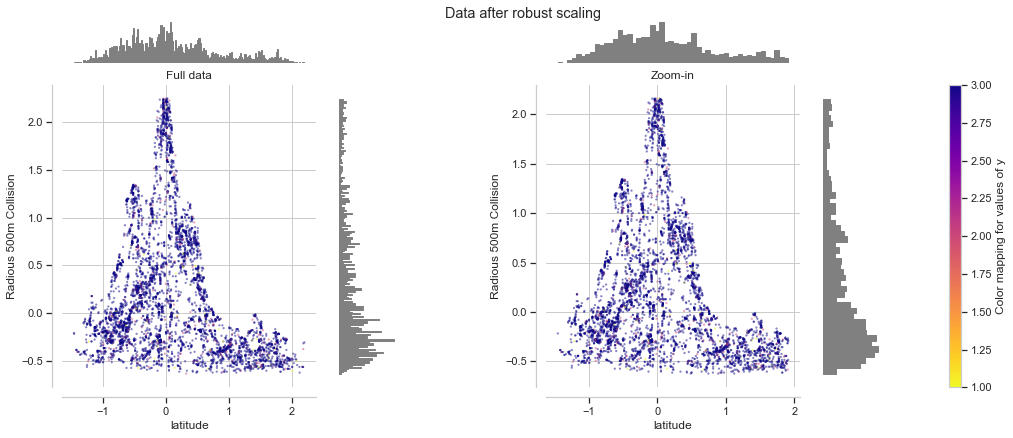

In [102]:
# Robust Scaling
scaler.make_plot(4)

In [103]:
# MinMaxScaler will be used as we want positive values for the index.

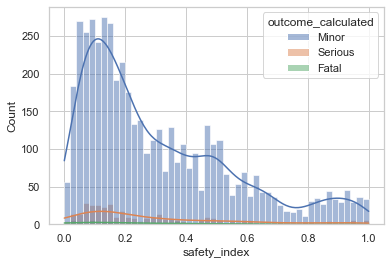

In [104]:
# Calculate safety index using minmax scaler
from sklearn.preprocessing import MinMaxScaler
# Use original column including outliers
minmax_scaler_df  =   pd.DataFrame(MinMaxScaler().fit_transform(dcc_geo_df[['radius_500m']].to_numpy()).tolist(),columns=['scaled']) 
dcc_geo_df['safety_index'] = minmax_scaler_df.scaled.tolist()

ax = sns.histplot(data=rsa.convert_df_labels(dcc_geo_df),bins=50, x="safety_index", hue="outcome_calculated", kde=True);
ax.figure.savefig("rsa/visualization/images/img13_safety_index_by_outcome.png")



At a glance, we can see that these data clearly are not normally distributed. They are right skewed. The peak is around 0.5, and the distribution extends further into the higher values than to the lower values. Lets evaluate what best distribution fits the safety index.

## Safety index distribution

### Normal Distribution

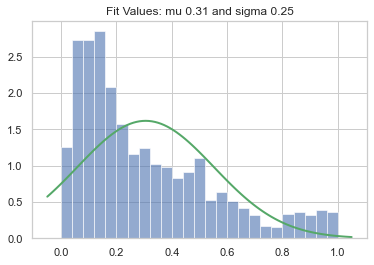

In [105]:
X = dcc_geo_df.safety_index.to_numpy();
rsa.plot_normal_dist(X)

## Exponential Distribution


True

(array([1.25834128, 2.7264061 , 2.7264061 , 2.85033365, 2.08770257,
        1.57769304, 1.16301239, 1.24404194, 1.02478551, 0.97712107,
        0.8293613 , 0.91515729, 1.10104862, 0.53384175, 0.63393708,
        0.51954242, 0.41944709, 0.31458532, 0.17159199, 0.1620591 ,
        0.32888465, 0.36701621, 0.31458532, 0.38608198, 0.36701621]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

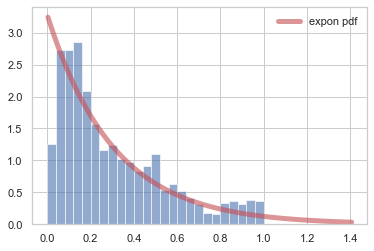

In [106]:
# Exponential
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# Fit
loc, scale = expon.fit(X, floc=0)

# Display the probability density function (``pdf``):
x = np.linspace(expon.ppf(0.01,loc, scale), expon.ppf(0.99, loc, scale), 100)
ax.plot(x, expon.pdf(x, loc, scale), 'r-', lw=5, alpha=0.6, label='expon pdf')

# Check accuracy of ``cdf`` and ``ppf``:
vals = expon.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], expon.cdf(vals))

# And compare the histogram:
ax.hist(X, bins=25, density=True, alpha=0.6, color='b');
ax.legend(loc='best', frameon=False)
plt.show()

### Chi-square

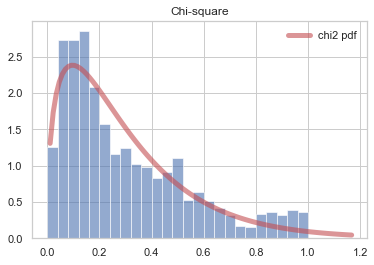

In [107]:
# Chi-square
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma
X = dcc_geo_df.safety_index.to_numpy();
rsa.plot_chi_square_dist(X,"rsa/visualization/images/img6_safety_index_distribution.png")

> The number of casualties has been normalized based giving us as an integer from 0 to 1. This integer is the safety index value and assigned to the location as a new feature. If a location has a HIGH safety index rating of 1, it implies that the location is prone to more accidents, within a 500 m radius of that location. In other words is high accident-prone. In the same way a LOW rating of 0 implies that a location is less prone to accidents due to a lower concentration of collision warnings in its vicinity.

In [108]:
# Save dataset to file
# Drop geometry
if "geometry" in dcc_geo_df.columns:
    dcc_geo_df.drop(columns=["geometry"],inplace=True)

In [109]:
dcc_df_final_csv = "rsa/data/dcc_df_final.csv"
dcc_geo_df.to_csv(dcc_df_final_csv)

# Statistics

## Descritive Analisis

In [110]:
pd.set_option('display.max_columns', None)
dcc_geo_df.describe()

id         year      weekday         hour      splimit  \
count   5245.000000  5245.000000  5245.000000  5245.000000  5245.000000   
mean   41391.204385  2010.975596     4.069018     2.815825    49.416587   
std    26718.572283     3.614027     1.863118     1.407732     8.612945   
min        2.000000  2005.000000     1.000000     1.000000    10.000000   
25%    18608.000000  2008.000000     3.000000     2.000000    50.000000   
50%    37126.000000  2011.000000     4.000000     3.000000    50.000000   
75%    69456.000000  2014.000000     6.000000     4.000000    50.000000   
max    83499.000000  2016.000000     7.000000     6.000000   120.000000   

            gender          age  county  vehicle_type  circumstances  \
count  5245.000000  5245.000000  5245.0   5245.000000    5245.000000   
mean      1.221926     5.563203     6.0      2.978074       7.144709   
std       0.526143     2.870133     0.0      1.343010       3.132625   
min       0.000000     1.000000     6.0      1.000000       1.000000   
25%       1.000000     5.000000     6.0      2.000000       5.000000   
50%       1.000000     6.000000     6.0      3.000000       7.000000   
75%       2.000000     7.000000     6.0      3.000000      10.000000   
max       2.000000    65.000000     6.0      6.000000      10.000000   

          latitude    longitude  total_casualties  outcome_calculated  \
count  5245.000000  5245.000000       5245.000000         5245.000000   
mean     53.348501    -6.265413          1.234890            2.914585   
std       0.022583     0.035264          0.643369            0.311774   
min      53.302152    -6.385915          1.000000            1.000000   
25%      53.331585    -6.284762          1.000000            3.000000   
50%      53.345280    -6.264842          1.000000            3.000000   
75%      53.361173    -6.245282          1.000000            3.000000   
max      53.410453    -6.143288         10.000000            3.000000   

          severity  knn_cluster  fbs_distance_m  fbs_station  \
count  5245.000000  5245.000000     5245.000000  5245.000000   
mean      0.075882     3.372164     1425.042069     2.398665   
std       0.264834     2.145789      831.922760     2.032881   
min       0.000000     0.000000        5.778145     0.000000   
25%       0.000000     1.000000      827.168846     1.000000   
50%       0.000000     4.000000     1283.919247     2.000000   
75%       0.000000     5.000000     1827.718788     4.000000   
max       1.000000     6.000000     4912.301418     8.000000   

       fbs_estimated_response_time  radius_500m  safety_index  
count                  5245.000000  5245.000000   5245.000000  
mean                     11.611601    89.857388      0.305352  
std                       5.816285    71.806040      0.246756  
min                       0.042097     1.000000      0.000000  
25%                       7.563209    34.000000      0.113402  
50%                      11.027802    65.000000      0.219931  
75%                      15.268004   135.000000      0.460481  
max                      39.797644   292.000000      1.000000

### Safety Index vs Is Gosafe.

In [111]:
# Probability of having a severe accident on a gosafe location.
total = dcc_geo_df.shape[0]
total_go_safe = dcc_geo_df[dcc_geo_df.is_gosafe == True].shape[0]
print(f"Probability of accidents on a gosafe location P(A)={ round((total_go_safe / total)*100,2) }%")

total = dcc_geo_df[dcc_geo_df.outcome_calculated == rsa.enums.outcome.FATAL].shape[0]
total_go_safe = dcc_geo_df[ (dcc_geo_df.is_gosafe == True) & (dcc_geo_df.outcome_calculated == rsa.enums.outcome.FATAL) ].shape[0]
print(f"Probability of fatal accidents on a gosafe location P(B)={ round((total_go_safe / total)*100,2) }%")

total = dcc_geo_df[dcc_geo_df.outcome_calculated == rsa.enums.outcome.SERIOUS].shape[0]
total_go_safe = dcc_geo_df[ (dcc_geo_df.is_gosafe == True) & (dcc_geo_df.outcome_calculated == rsa.enums.outcome.SERIOUS) ].shape[0]
print(f"Probability of serious accidents on a gosafe location P(C)={ round((total_go_safe / total)*100,2) }%")

Probability of accidents on a gosafe location P(A)=82.21%
Probability of fatal accidents on a gosafe location P(B)=64.0%
Probability of serious accidents on a gosafe location P(C)=84.2%


In [112]:
# Probability of having a severe accident on a gosafe location.
total = dcc_geo_df.shape[0]
total_go_safe = dcc_geo_df[dcc_geo_df.safety_index > 0.5].shape[0]
print(f"Probability of accidents with safety index > 0.5 location P(A)={ round((total_go_safe / total)*100,2) }%")

total = dcc_geo_df[dcc_geo_df.outcome_calculated == rsa.enums.outcome.FATAL].shape[0]
total_go_safe = dcc_geo_df[ (dcc_geo_df.safety_index > 0.5) & (dcc_geo_df.outcome_calculated == rsa.enums.outcome.FATAL) ].shape[0]
print(f"Probability of fatal accidents with safety index > 0.5 P(B)={ round((total_go_safe / total)*100,2) }%")

total = dcc_geo_df[dcc_geo_df.outcome_calculated == rsa.enums.outcome.SERIOUS].shape[0]
total_go_safe = dcc_geo_df[ (dcc_geo_df.safety_index > 0.5) & (dcc_geo_df.outcome_calculated == rsa.enums.outcome.SERIOUS) ].shape[0]
print(f"Probability of serious accidents with safety index > 0.5 P(C)={ round((total_go_safe / total)*100,2) }%")

Probability of accidents with safety index > 0.5 location P(A)=20.31%
Probability of fatal accidents with safety index > 0.5 P(B)=6.0%
Probability of serious accidents with safety index > 0.5 P(C)=18.1%


In [113]:
# Probability of having a severe accident on a gosafe location.
total = dcc_geo_df.shape[0]
total_go_safe = dcc_geo_df[dcc_geo_df.safety_index > 0.5].shape[0]
print(f"Probability of accidents with safety index > 0.5 location P(A)={ round((total_go_safe / total)*100,2) }%")

total = dcc_geo_df[dcc_geo_df.outcome_calculated == rsa.enums.outcome.FATAL].shape[0]
total_go_safe = dcc_geo_df[ (dcc_geo_df.safety_index > 0.5) & (dcc_geo_df.outcome_calculated == rsa.enums.outcome.FATAL) ].shape[0]
print(f"Probability of fatal accidents with safety index > 0.5 P(B)={ round((total_go_safe / total)*100,2) }%")

total = dcc_geo_df[dcc_geo_df.outcome_calculated == rsa.enums.outcome.SERIOUS].shape[0]
total_go_safe = dcc_geo_df[ (dcc_geo_df.safety_index > 0.5) & (dcc_geo_df.outcome_calculated == rsa.enums.outcome.SERIOUS) ].shape[0]
print(f"Probability of serious accidents with safety index > 0.5 P(C)={ round((total_go_safe / total)*100,2) }%")

Probability of accidents with safety index > 0.5 location P(A)=20.31%
Probability of fatal accidents with safety index > 0.5 P(B)=6.0%
Probability of serious accidents with safety index > 0.5 P(C)=18.1%


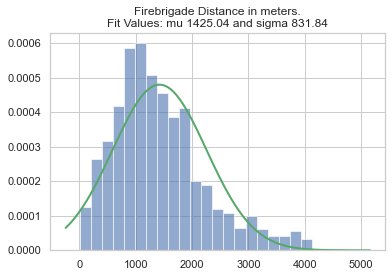

In [114]:
rsa.plot_normal_dist(dcc_geo_df.fbs_distance_m, "Firebrigade Distance in meters.")

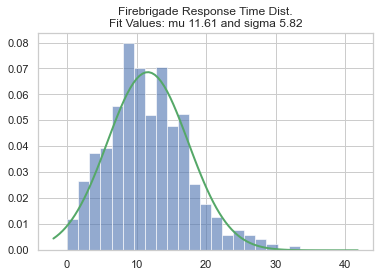

In [115]:
rsa.plot_normal_dist(dcc_geo_df.fbs_estimated_response_time, "Firebrigade Response Time Dist.")

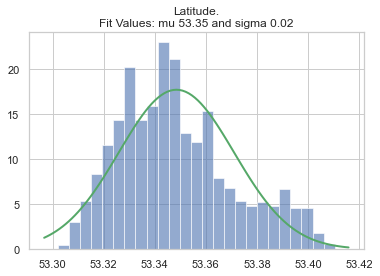

In [116]:
rsa.plot_normal_dist(dcc_geo_df.latitude, "Latitude." , "rsa/visualization/images/img14_latitude_normal_d.png")

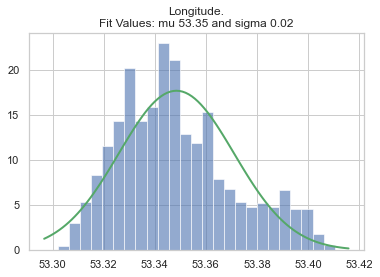

In [117]:
rsa.plot_normal_dist(dcc_geo_df.latitude, "Longitude." , "rsa/visualization/images/img15_longitude_normal_d.png")

In [118]:
dcc_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5245 entries, 0 to 5327
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5245 non-null   int64  
 1   year                         5245 non-null   int64  
 2   weekday                      5245 non-null   int64  
 3   hour                         5245 non-null   int64  
 4   splimit                      5245 non-null   int64  
 5   gender                       5245 non-null   int64  
 6   age                          5245 non-null   int64  
 7   county                       5245 non-null   int64  
 8   vehicle_type                 5245 non-null   int64  
 9   circumstances                5245 non-null   int64  
 10  latitude                     5245 non-null   float64
 11  longitude                    5245 non-null   float64
 12  total_casualties             5245 non-null   float64
 13  outcome_ca

In [119]:
sorted(dcc_geo_df.is_fatal.unique())

[False, True]

### Poisson distribution

Text(0.5, 1.0, 'Total accidents per year trend.')

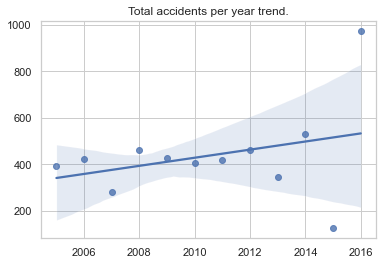

In [120]:
r = dcc_geo_df.year.value_counts()
x = r.index
y = r.values
fig = sns.regplot(x=x,y=y)
plt.title("Total accidents per year trend.")
fig.figure.savefig("rsa/visualization/images/img16_accidents_trends.png")


In [121]:
r.sort_index()

2005    394
2006    424
2007    279
2008    462
2009    426
2010    406
2011    417
2012    462
2013    345
2014    531
2015    124
2016    975
Name: year, dtype: int64

On average 1.1974885844748857 accidents occurs in dublin in 1 day
Probability of 3 accidents in dublin in 1 day is 0.086


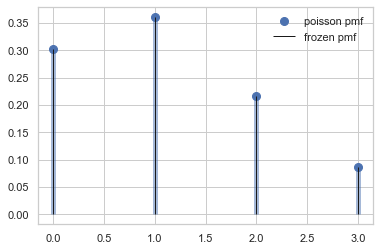

In [122]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Calculate Probability of accidents per day
mu = r.mean() / 365
print(f"On average {mu} accidents occurs in dublin in 1 day")
print(f"Probability of 3 accidents in dublin in 1 day is {round(poisson.pmf(3,mu),3)}")



fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()
